<a href="https://colab.research.google.com/github/armandordorica/APS1070_Anomaly_Detection/blob/master/APS1070_Project_2_part_2_only.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2, APS1070 Summer 2020
**Anomaly Detection Algorithm using Gaussian Mixture Model [20 Marks]**

**Deadline: June 18, 23:00 - 20 points**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Name: 
*   Student Number: 

##Part 1: Getting started [6 Marks]

We are going to work with a credit card fraud dataset. This dataset contains 28 key features, which are not 
directly interpretable but contain meaningful information about the dataset.

Load the dataset in CSV file using Pandas. The dataset is called `creditcard.csv`. Print out the first few columns of the dataset.

* How many rows are there? _____
* What features in the dataset are present aside from the 28 main features?  _____
* Which column contains the targets? To what do the values correspond?_____

In [1]:
pip install wget

In [2]:
import wget

wget.download('https://github.com/aps1070-2019/datasets/raw/master/creditcard.tar.gz','creditcard.tar.gz')

'creditcard.tar (2).gz'

In [3]:
!tar -zxvf creditcard.tar.gz

creditcard.csv


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from sklearn.model_selection import train_test_split
df = pd.read_csv('creditcard.csv')
df['rows']= np.arange(0,df['V23'].values.shape[0],1)

In [5]:

### HERE ###

It's important when looking at a new dataset to figure out how many examples we have for each class.

* What is the percentage of entries in the dataset for each class? _____
* Is this data considered balanced or unbalanced? Why is this the case?_____
* Why is balance/imbalance important? How might this class ditribution affect a KNN classifier for example, which we explored in Project 1? _____



In [6]:
### HERE ###

Next, split the dataset into a training and testing set. Use a test size of one third, and set the random state to 1.

Make sure to separate out the column corresponding to the targets.

As mentioned earlier, in this lab we are going to use Gaussian distributions to model the data. To accomplish this, we are going to introduce `scipy`, a package which contains a wide variety of tools for working with scientific data in Python. Its `stats` package allows us to easily model various statistical distributions, and get information about them.

Scipy's Gaussian distribution class is called `norm`. It takes two parameters - `loc`, which corresponds to the mean of your distribution, and `scale`, which corresponds to the standard deviation.

* What are the mean and standard deviation for variable V11? Make sure to only use your training set for this calculation. _____

Use the code below to set up a Gaussian object for V11.

In [7]:

y = df['Class']
X = df.loc[:, df.columns != 'Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

y_train = y_train.to_frame()

X_train.reset_index(inplace=True)

In [8]:
filter_indices = y_train[y_train['Class']==0].index

In [9]:

non_fraud_X_train = X_train[X_train['index'].isin(filter_indices)]

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


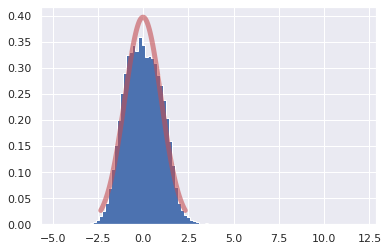

In [10]:


arr = np.array(non_fraud_X_train['V11'])
std_dev = np.std(arr)
mean = np.mean(arr)


from scipy import stats

norm = stats.norm(

    loc = mean,  ### REPLACE "0" WITH YOUR CODE TO GET THE MEAN OF V11 ### 
    scale = std_dev ### REPLACE "0" WITH YOUR CODE TO GET THE STANDARD DEVIATION OF V11 ### 

)

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.gridspec as gridspec

var_name = 'V11'

fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')
ax.hist(X_train[var_name].values, density=True, histtype='stepfilled', bins=100);
plt.show()


We can also look at the difference in distribution for some variables between fraudulent and non-fraudulent transactions:

In [11]:
X_train

,index,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,rows
0,37372,38927.0,1.016658,0.139269,0.302209,0.986137,0.375761,0.886556,-0.095053,0.340130,-0.065755,-0.182531,0.865235,0.696081,-0.084669,0.521748,1.981066,-1.313444,0.894049,-2.206478,-2.047926,-0.269183,0.174774,0.681627,0.060051,-0.622008,0.327565,-0.221191,0.084139,0.010645,13.70,37372
1,215884,140262.0,-2.546080,1.129681,0.401727,1.185293,-0.567482,-0.589366,-0.537083,1.353510,-0.525949,-0.748787,-1.640814,-0.390295,-1.515830,1.332434,0.559218,-0.015673,0.590390,-0.141065,0.922782,-0.212339,-0.337334,-1.528312,-0.155582,-0.199122,0.245588,-0.859024,-0.278776,-0.191483,1.00,215884
2,98616,66732.0,1.336743,-0.623283,0.135579,-0.942049,-0.653556,-0.280165,-0.541596,-0.027829,-1.034029,0.760954,0.795079,-0.111996,0.239959,0.041546,0.140385,1.641911,-0.311148,-0.882922,1.234933,0.198038,-0.112456,-0.589816,-0.003113,-0.526733,0.286137,-0.487532,-0.007267,0.011304,55.00,98616
3,172195,120995.0,-1.033347,-0.453670,0.633679,-0.205151,-0.543829,0.786511,2.217916,-0.109946,0.310629,-0.711619,-0.177289,0.214419,-1.324015,-0.221308,-2.510475,-0.582477,-0.161588,-0.199618,0.793824,0.841673,-0.153555,-0.588776,0.675765,-0.448676,0.039364,0.081194,0.038786,-0.017385,389.98,172195
4,19496,30328.0,-0.440280,-1.339789,1.840669,-2.069536,-0.898234,-0.397711,-1.004230,0.101991,-1.488139,0.663768,-1.451948,-0.556253,1.307404,-1.292904,-0.985107,-0.184252,0.205590,0.218414,-0.554273,-0.079274,-0.086545,0.059621,0.184900,-0.129365,-0.331937,-0.394832,0.101876,0.088869,60.80,19496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190815,21440,31666.0,-2.986845,-8.663978,-1.910863,0.664058,-3.934875,0.861269,1.647511,-0.480963,-1.546866,0.346951,0.276998,-0.167592,0.213818,-0.139022,-1.375023,-0.426207,0.771636,0.967956,-0.170608,4.315113,1.252092,-0.993085,-2.173147,0.145570,-0.235062,-0.227411,-0.382702,0.404045,2312.26,21440
190816,117583,74729.0,0.937083,-0.849673,0.524186,-0.020031,-0.606327,0.692302,-0.463724,0.148857,0.785062,-0.400162,0.113700,1.666005,1.587666,-0.683250,-1.059042,0.368635,-0.608646,0.089697,1.132807,0.396079,-0.143322,-0.479981,-0.237902,-0.715247,0.251418,0.975406,-0.060168,0.023771,171.32,117583
190817,73349,55095.0,-1.149963,1.696462,1.637114,2.658991,-0.021502,0.192287,0.205204,0.588754,-1.187820,-0.480985,-0.395574,-0.129168,-0.294736,-1.026354,-0.348257,-0.199641,1.589715,-0.284752,-0.374565,-0.127011,0.025147,0.086506,-0.262748,0.321538,0.341667,0.210343,-0.162047,0.031193,7.58,73349
190818,267336,162728.0,1.754554,-0.699398,-0.076332,0.443915,-0.672082,0.389061,-0.807534,0.202915,0.858635,0.102675,1.051043,1.643280,1.265712,-0.306132,-0.004562,0.739688,-0.931197,0.364436,-0.199706,0.088014,0.141950,0.358412,0.259748,0.746839,-0.560808,0.104636,-0.005853,-0.019622,94.80,267336


KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f1fa8e5e048> (for post_execute):


KeyboardInterrupt: ignored

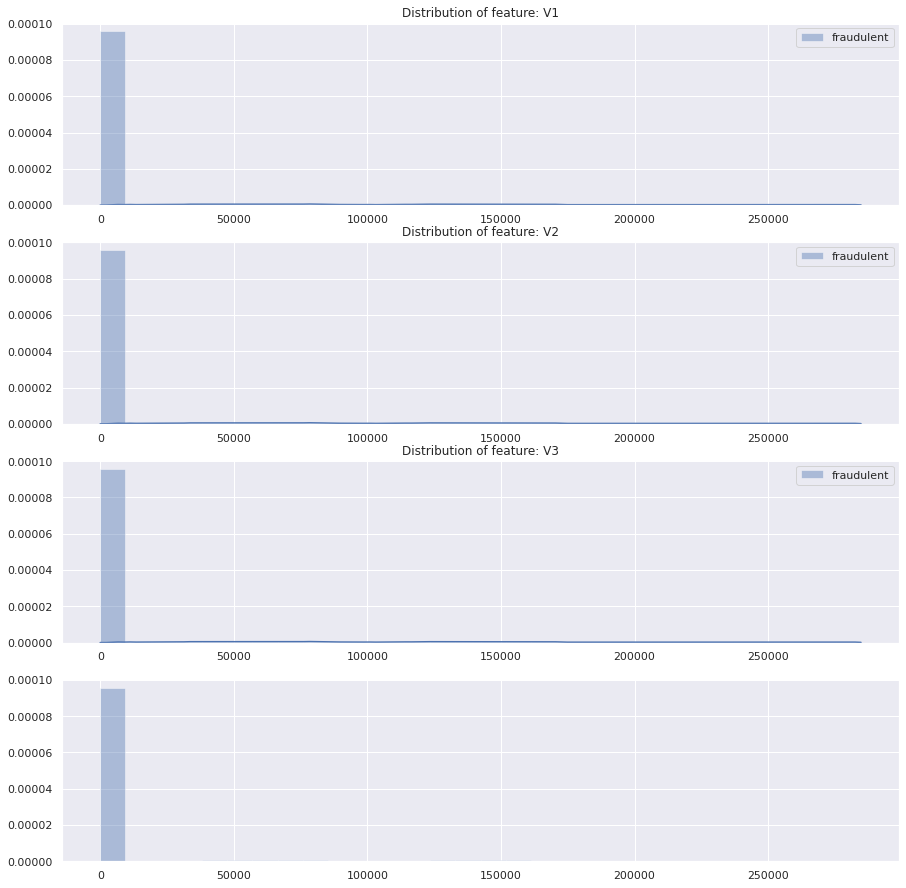

In [12]:
features=[f for f in df.columns if 'V' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    #sns.distplot(X_train[feat][y_train==1], bins=30)
    sns.distplot(non_fraud_X_train ,bins=30)
    ax.legend(['fraudulent', 'non-fraudulent'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

**Q.** Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model. **[2 Marks]**

**Type your answer here**

## Part 2: Single Variable Gaussian Distribution: [7 Marks]
We'll start by making a prediction using **a single feature of our dataset at a time**. Let's explore the following scenarios:

1.   **One Gaussian:** First, we will fit a single gaussian distribution.

  *   Plot a ROC curve for each feature, fitting non-fraudulent transactions.
  *   Find the best feature to distinguish fraudulent transactions from non-fraudulent transactions based on AUC (Area under the ROC Curve)
  *  To make a prediction, we compute the probability that each transaction in the training set belongs to that distribution. If the probability is lower than a threshold, we consider that transaction a fraud. Find an optimal threshold that maximizes the F1 Score in the training set. Report peformance on the test set as well.

  


2.   **Two Gaussians:** In this case, we will fit a Gaussian to each class in the selected feature above — one gaussian to the feature of non-fraudulent transactions and one gaussian for fraudulent transactions. To make predictions, we use the probability of a transaction belonging to the fraudulent Gaussian distribution and non-fraudulent distribution. 

  * Build a classifier using this two-gaussian approach on the training set, and once complete, test performance on the test set.

Summarize your findings.


### Anomaly Detection Algorithm
Given that there are $m$ training examples and $n$ features 
1. Choose features that you think might be indicative of anomalous examples. 
2. Fit Parameters $\mu_1, \mu_2 ..., \mu_n$ as well as $\sigma_1^2, \sigma_2^2, ...\sigma_n^2$

$$
\mu_j = \frac{1}{m} \sum_{i=1}^{m}x_j^{(i)}
$$

where $\mu_j$ is the average value of the $j$th feature. 

$$
\sigma_j^2 = \frac{1}{m} \sum_{i=1}^{m}(X_{j}^{(i)} - \mu_j)^2
$$

3. Given new example $x$, compute $p(x)$: 

$$
p(x) = \prod_{j=1}^n p(x_j\; \mu_j, \sigma_j^2)=\prod_{j=1}^n \frac{1}{\sqrt{2\pi\sigma_j} }exp \left( \frac{-(x_j-\mu_j)^2}{2\sigma_j^2}\right)
$$

In [13]:
column_names = ["var_name", "epsilon", "AUC", "F1_score"]

results = pd.DataFrame(columns = column_names)

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.gridspec as gridspec
import math
from math import e
from sklearn.metrics import accuracy_score
import pandas as pd 
from scipy import stats
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score



def p_x(x, mu, sigma): 
  """
  Inputs: x, mu is the average of a gaussian, sigma is the std dev of the gaussian 
  Outputs: probability of a value in a Gaussian 
  """
  return 1/(math.sqrt(2*math.pi)*sigma)*np.exp(-(x-mu)**2/(2*sigma**2))


In [17]:
y = df['Class']
X = df.loc[:, df.columns != 'Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

y_train = y_train.to_frame()
filter_indices = y_train[y_train['Class']==0].index

non_fraud_X_train = X_train.loc[filter_indices]

In [18]:
epsilons = np.arange(0.0001,0.3,0.01)
epsilons

array([1.000e-04, 1.010e-02, 2.010e-02, 3.010e-02, 4.010e-02, 5.010e-02,
       6.010e-02, 7.010e-02, 8.010e-02, 9.010e-02, 1.001e-01, 1.101e-01,
       1.201e-01, 1.301e-01, 1.401e-01, 1.501e-01, 1.601e-01, 1.701e-01,
       1.801e-01, 1.901e-01, 2.001e-01, 2.101e-01, 2.201e-01, 2.301e-01,
       2.401e-01, 2.501e-01, 2.601e-01, 2.701e-01, 2.801e-01, 2.901e-01])

### **Find probabilities of each of the points of the testing set of belonging to the distribution fitted by non fraudulent transactions of the training set**

Epsilon: 0.0001


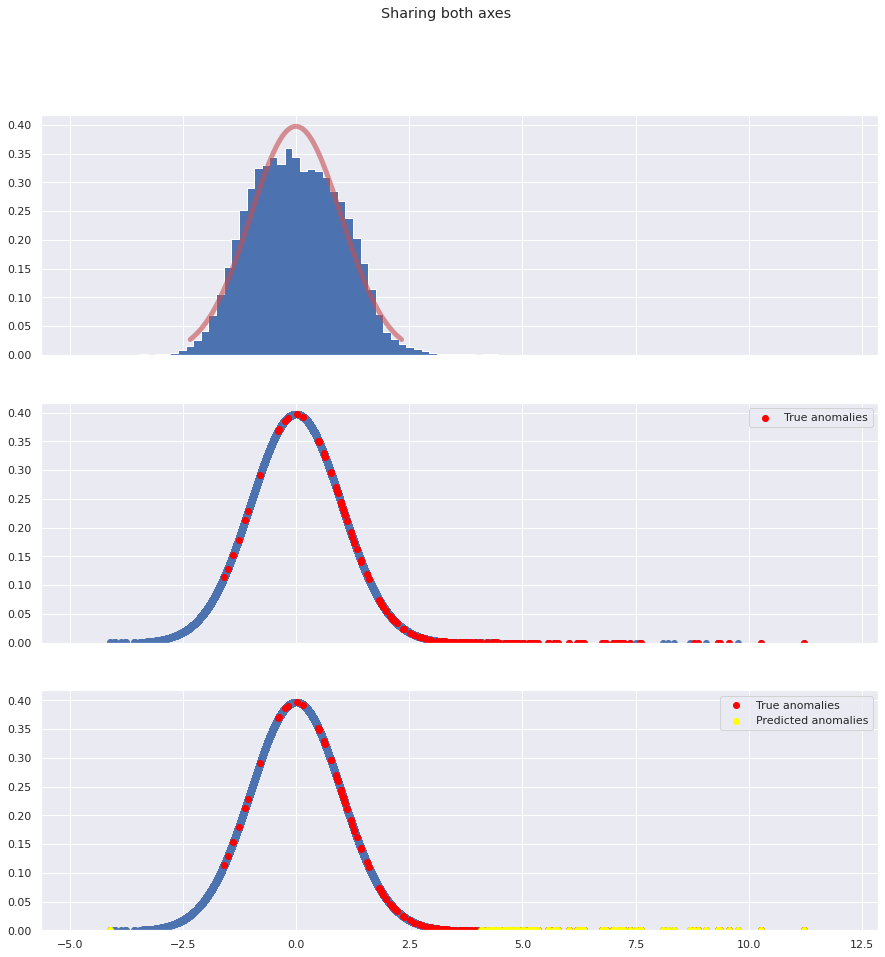

AUC: 0.117


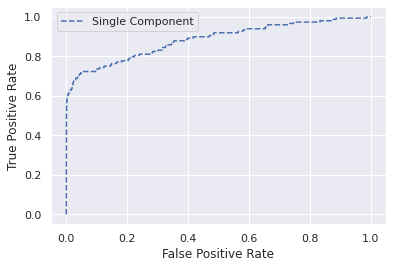

F1 score: 0.559
  var_name  epsilon       AUC  F1_score
0      V11   0.0001  0.116556  0.558952
Epsilon: 0.0101


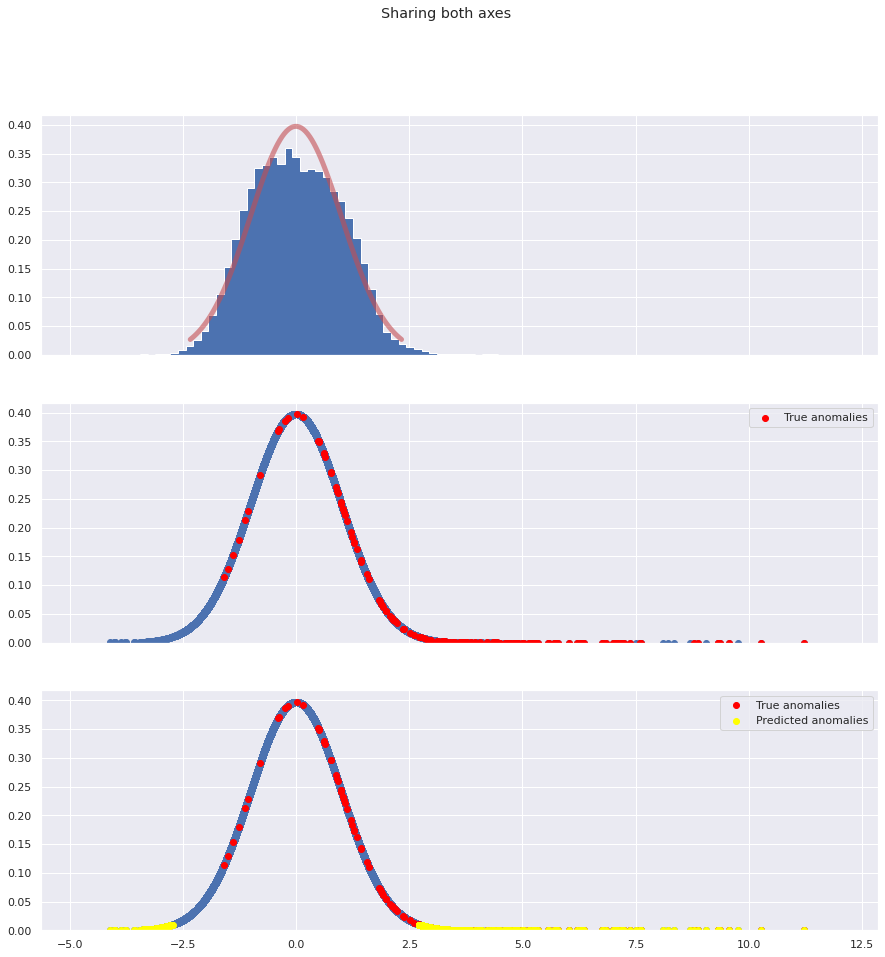

AUC: 0.117


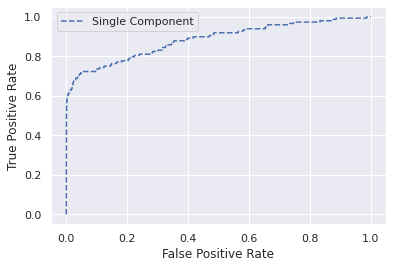

F1 score: 0.278
  var_name  epsilon       AUC  F1_score
0      V11   0.0001  0.116556  0.558952
0      V11   0.0101  0.116556  0.278481
Epsilon: 0.0201


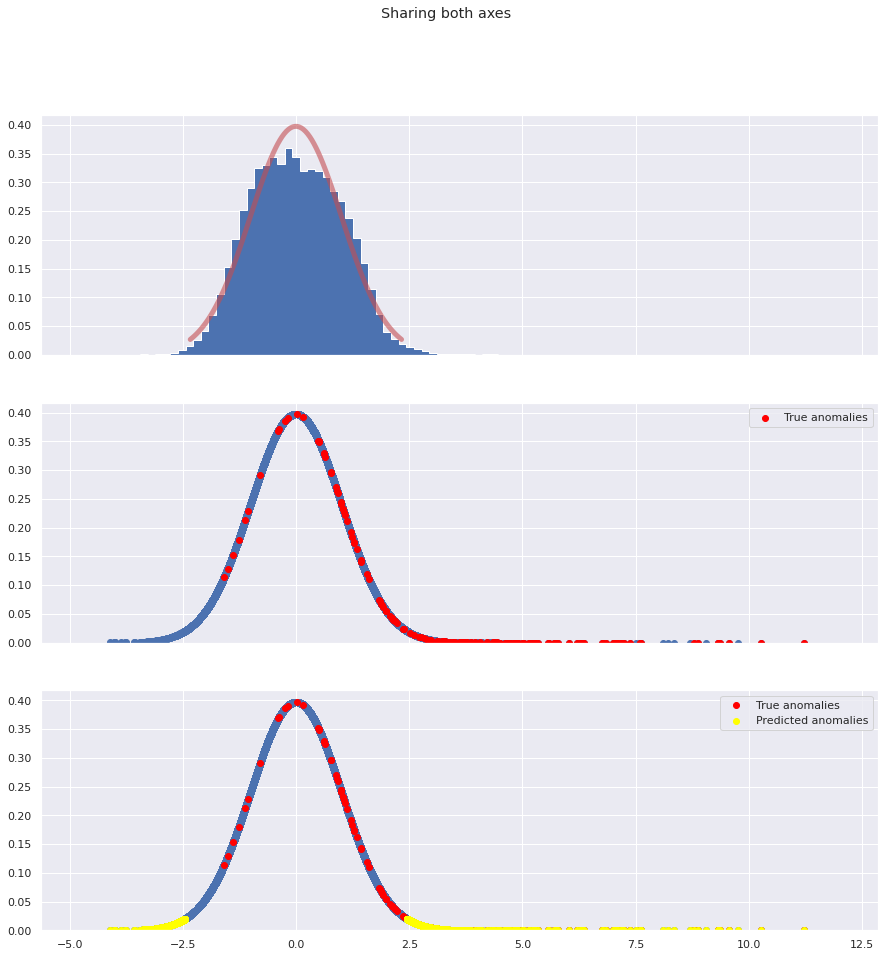

AUC: 0.117


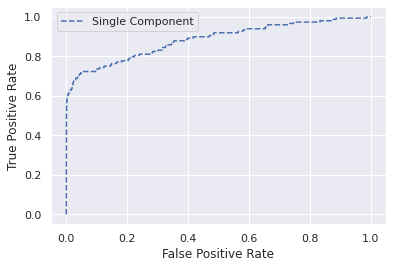

F1 score: 0.166
  var_name  epsilon       AUC  F1_score
0      V11   0.0001  0.116556  0.558952
0      V11   0.0101  0.116556  0.278481
0      V11   0.0201  0.116556  0.166210
Epsilon: 0.0301


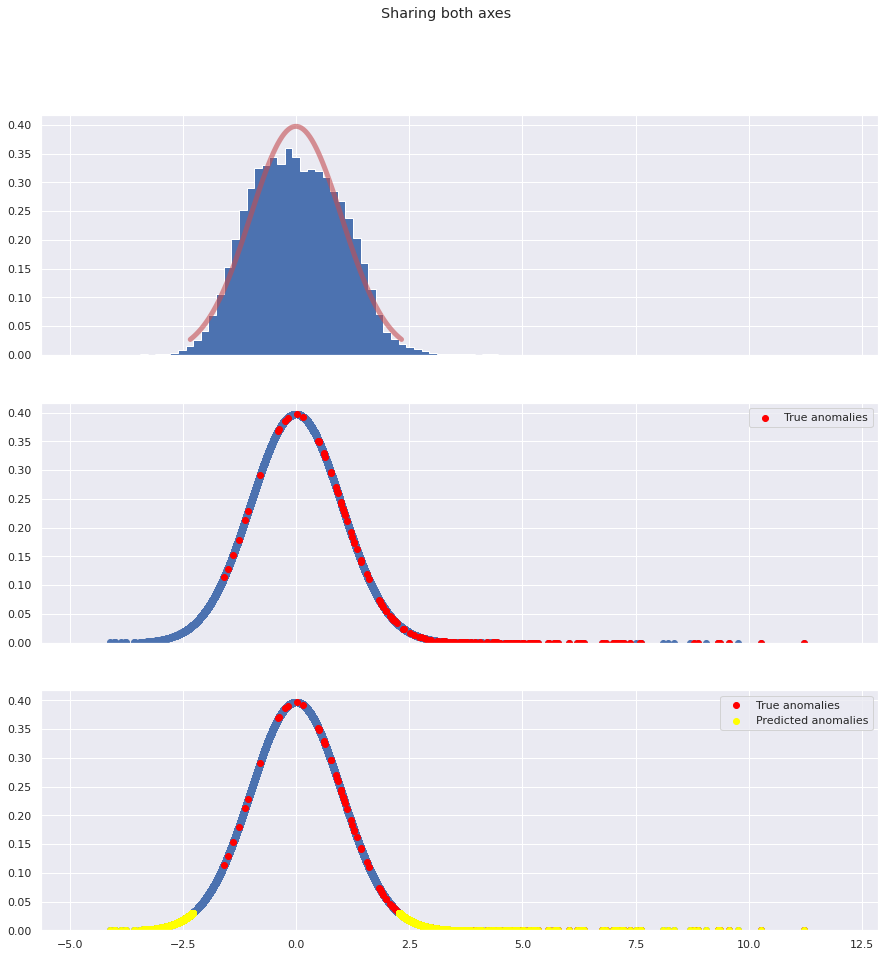

AUC: 0.117


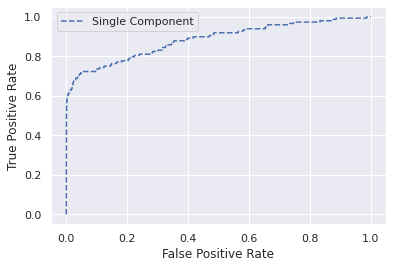

F1 score: 0.115
  var_name  epsilon       AUC  F1_score
0      V11   0.0001  0.116556  0.558952
0      V11   0.0101  0.116556  0.278481
0      V11   0.0201  0.116556  0.166210
0      V11   0.0301  0.116556  0.115028
Epsilon: 0.040100000000000004


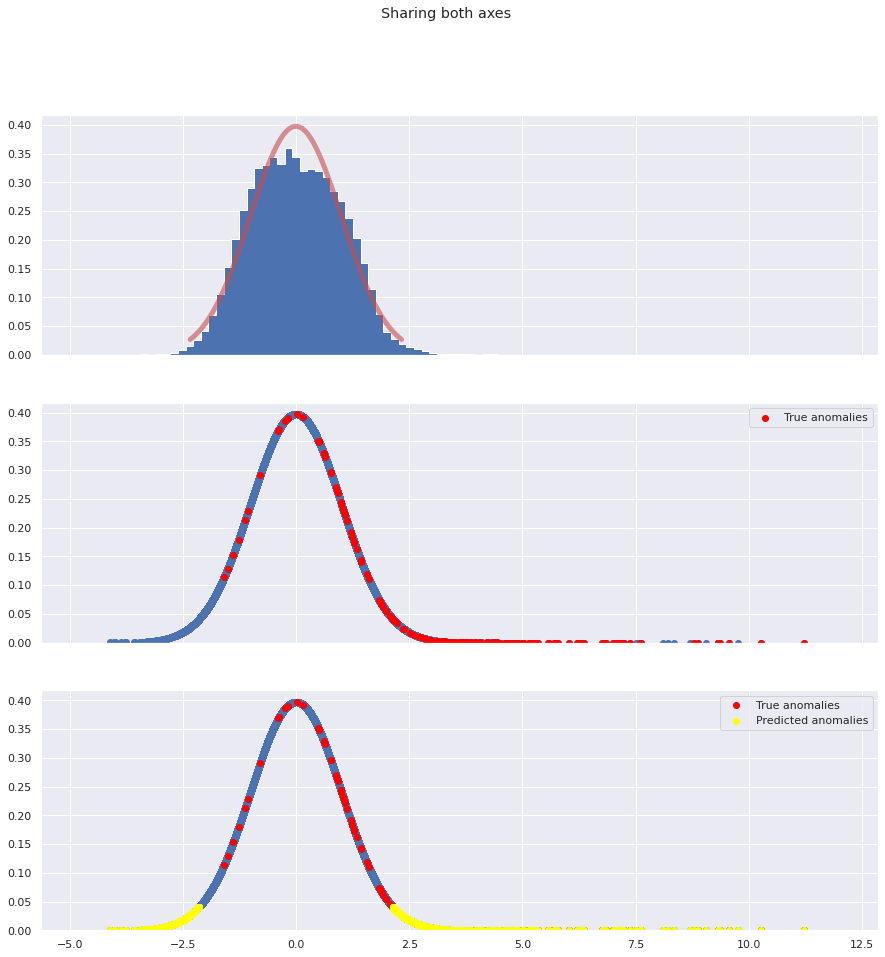

AUC: 0.117


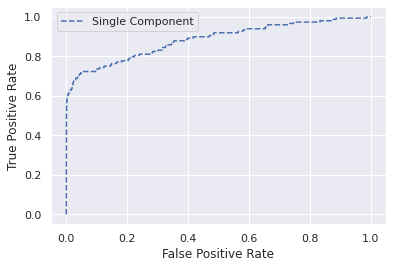

F1 score: 0.090
  var_name  epsilon       AUC  F1_score
0      V11   0.0001  0.116556  0.558952
0      V11   0.0101  0.116556  0.278481
0      V11   0.0201  0.116556  0.166210
0      V11   0.0301  0.116556  0.115028
0      V11   0.0401  0.116556  0.089649
Epsilon: 0.050100000000000006


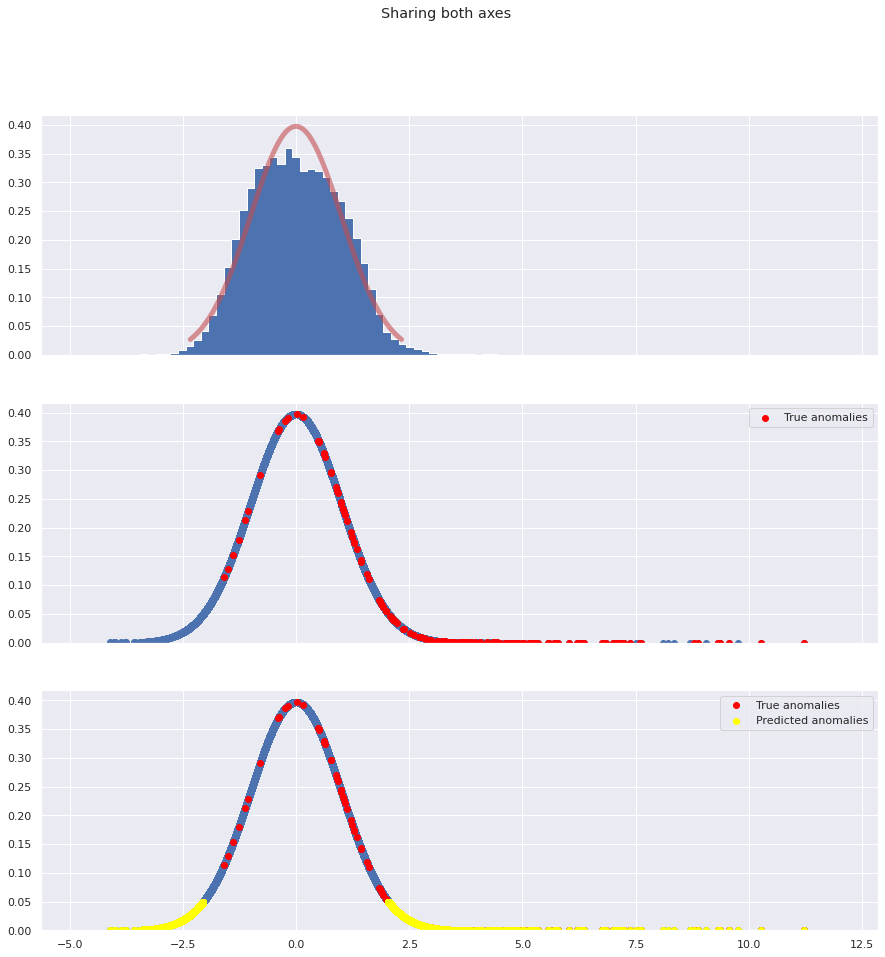

AUC: 0.117


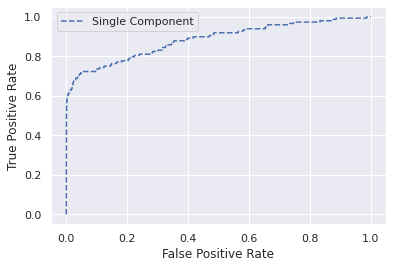

F1 score: 0.072
  var_name  epsilon       AUC  F1_score
0      V11   0.0001  0.116556  0.558952
0      V11   0.0101  0.116556  0.278481
0      V11   0.0201  0.116556  0.166210
0      V11   0.0301  0.116556  0.115028
0      V11   0.0401  0.116556  0.089649
0      V11   0.0501  0.116556  0.071788
Epsilon: 0.0601


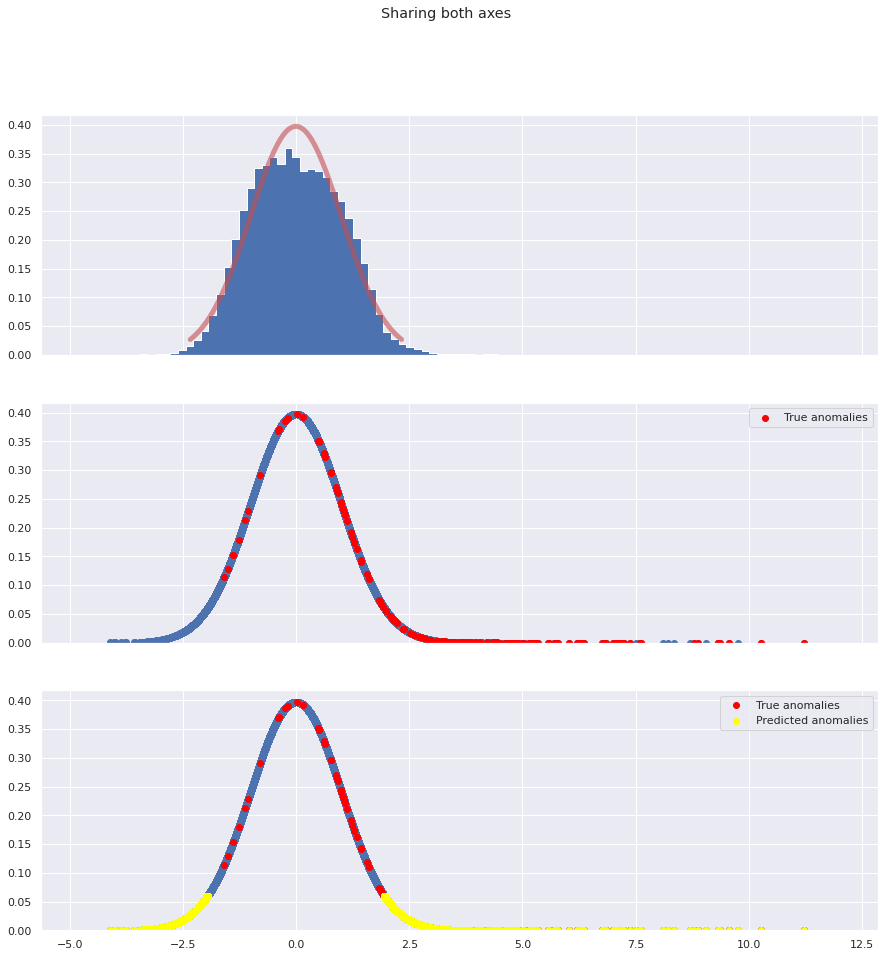

AUC: 0.117


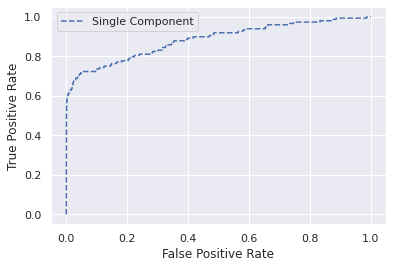

F1 score: 0.057
  var_name  epsilon       AUC  F1_score
0      V11   0.0001  0.116556  0.558952
0      V11   0.0101  0.116556  0.278481
0      V11   0.0201  0.116556  0.166210
0      V11   0.0301  0.116556  0.115028
0      V11   0.0401  0.116556  0.089649
0      V11   0.0501  0.116556  0.071788
0      V11   0.0601  0.116556  0.057400
Epsilon: 0.07010000000000001


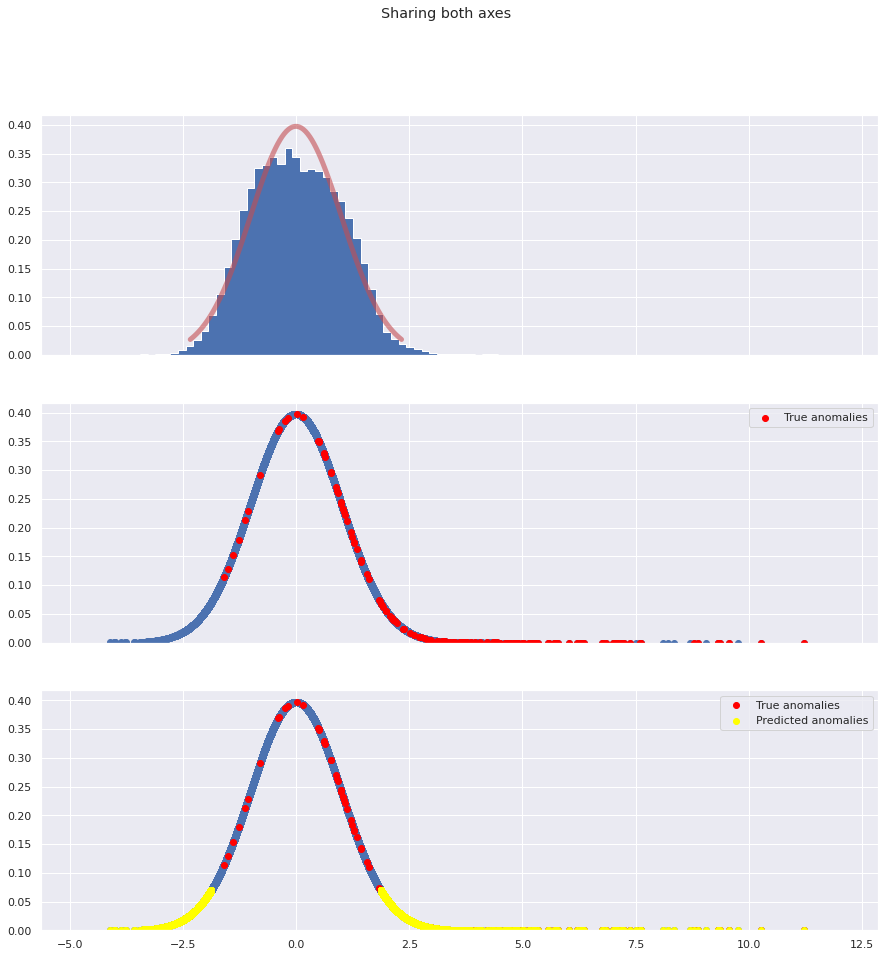

AUC: 0.117


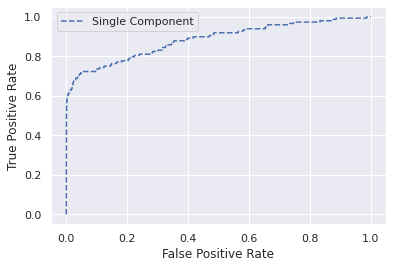

F1 score: 0.047
  var_name  epsilon       AUC  F1_score
0      V11   0.0001  0.116556  0.558952
0      V11   0.0101  0.116556  0.278481
0      V11   0.0201  0.116556  0.166210
0      V11   0.0301  0.116556  0.115028
0      V11   0.0401  0.116556  0.089649
0      V11   0.0501  0.116556  0.071788
0      V11   0.0601  0.116556  0.057400
0      V11   0.0701  0.116556  0.046833
Epsilon: 0.0801


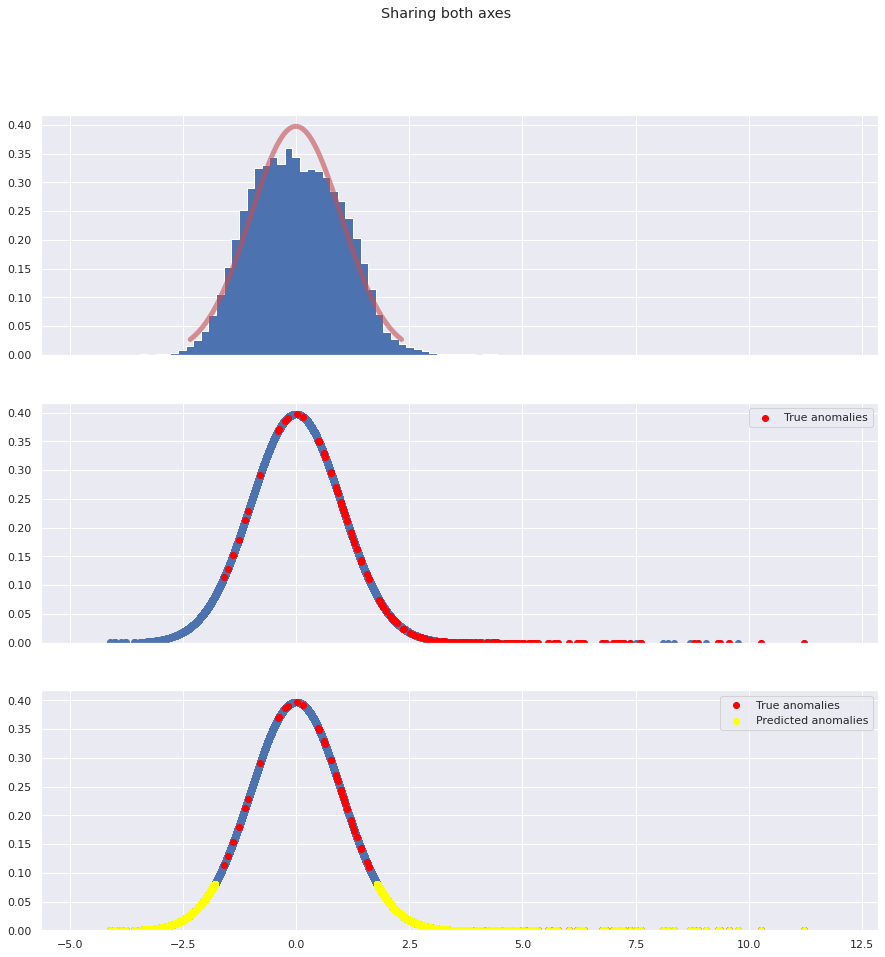

AUC: 0.117


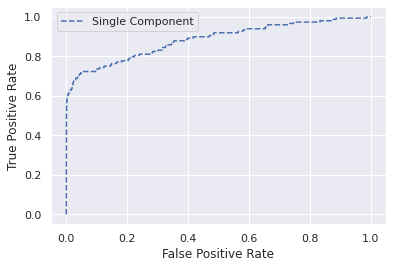

F1 score: 0.039
  var_name  epsilon       AUC  F1_score
0      V11   0.0001  0.116556  0.558952
0      V11   0.0101  0.116556  0.278481
0      V11   0.0201  0.116556  0.166210
0      V11   0.0301  0.116556  0.115028
0      V11   0.0401  0.116556  0.089649
0      V11   0.0501  0.116556  0.071788
0      V11   0.0601  0.116556  0.057400
0      V11   0.0701  0.116556  0.046833
0      V11   0.0801  0.116556  0.038831
Epsilon: 0.0901


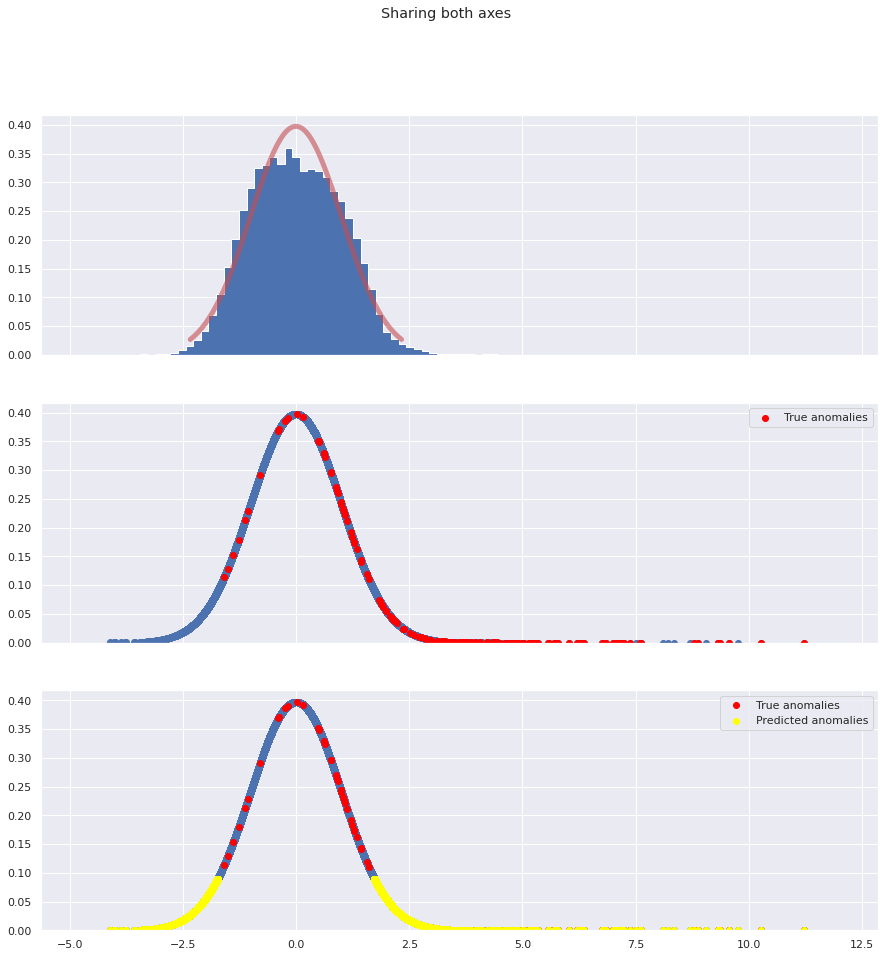

AUC: 0.117


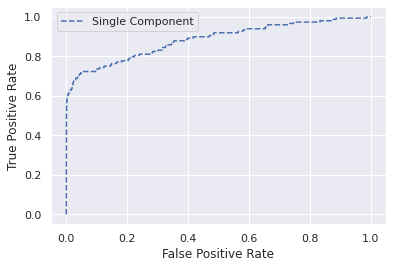

F1 score: 0.032
  var_name  epsilon       AUC  F1_score
0      V11   0.0001  0.116556  0.558952
0      V11   0.0101  0.116556  0.278481
0      V11   0.0201  0.116556  0.166210
0      V11   0.0301  0.116556  0.115028
0      V11   0.0401  0.116556  0.089649
0      V11   0.0501  0.116556  0.071788
0      V11   0.0601  0.116556  0.057400
0      V11   0.0701  0.116556  0.046833
0      V11   0.0801  0.116556  0.038831
0      V11   0.0901  0.116556  0.032137
Epsilon: 0.10010000000000001


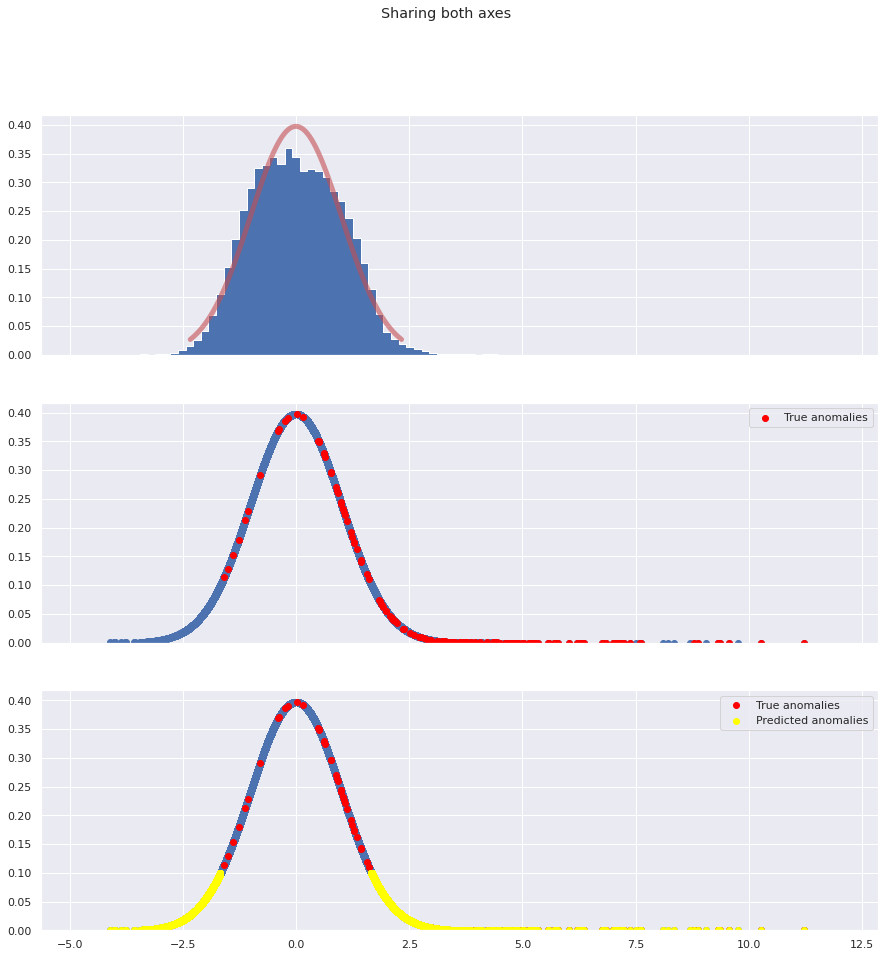

AUC: 0.117


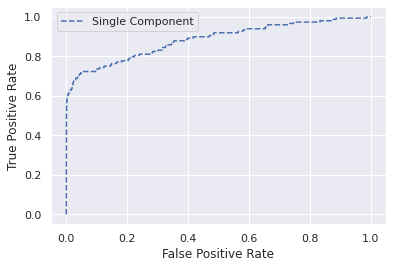

F1 score: 0.027
  var_name  epsilon       AUC  F1_score
0      V11   0.0001  0.116556  0.558952
0      V11   0.0101  0.116556  0.278481
0      V11   0.0201  0.116556  0.166210
0      V11   0.0301  0.116556  0.115028
0      V11   0.0401  0.116556  0.089649
0      V11   0.0501  0.116556  0.071788
0      V11   0.0601  0.116556  0.057400
0      V11   0.0701  0.116556  0.046833
0      V11   0.0801  0.116556  0.038831
0      V11   0.0901  0.116556  0.032137
0      V11   0.1001  0.116556  0.026952
Epsilon: 0.1101


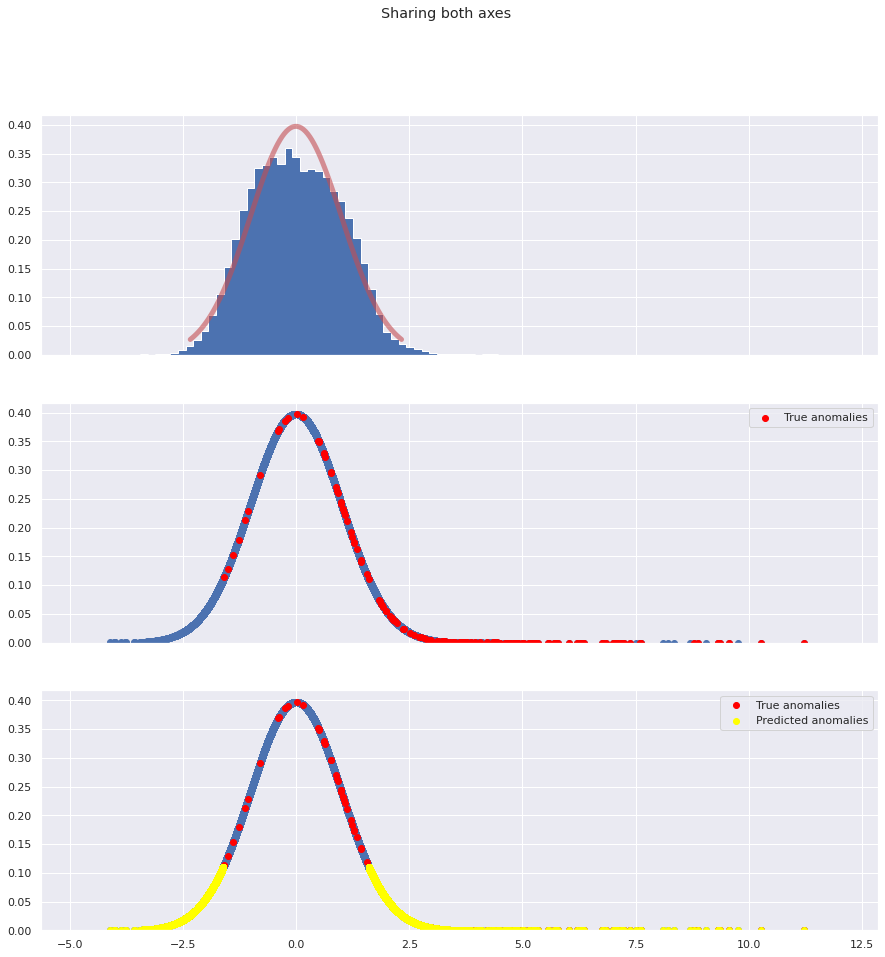

AUC: 0.117


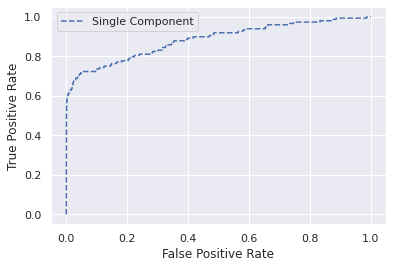

F1 score: 0.023
  var_name  epsilon       AUC  F1_score
0      V11   0.0001  0.116556  0.558952
0      V11   0.0101  0.116556  0.278481
0      V11   0.0201  0.116556  0.166210
0      V11   0.0301  0.116556  0.115028
0      V11   0.0401  0.116556  0.089649
0      V11   0.0501  0.116556  0.071788
0      V11   0.0601  0.116556  0.057400
0      V11   0.0701  0.116556  0.046833
0      V11   0.0801  0.116556  0.038831
0      V11   0.0901  0.116556  0.032137
0      V11   0.1001  0.116556  0.026952
0      V11   0.1101  0.116556  0.023266
Epsilon: 0.1201


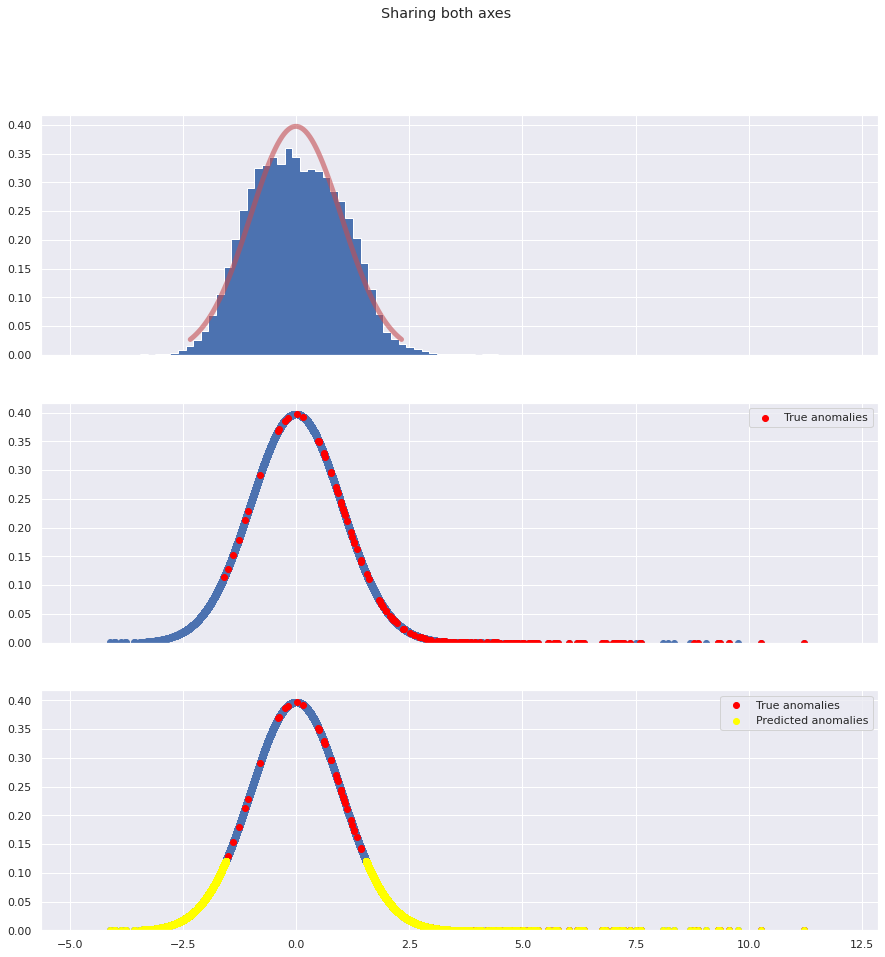

AUC: 0.117


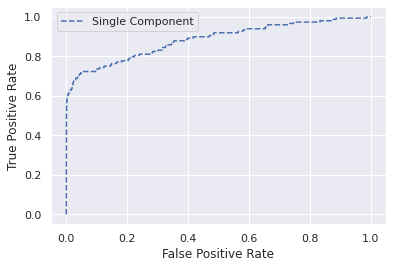

F1 score: 0.021
  var_name  epsilon       AUC  F1_score
0      V11   0.0001  0.116556  0.558952
0      V11   0.0101  0.116556  0.278481
0      V11   0.0201  0.116556  0.166210
0      V11   0.0301  0.116556  0.115028
0      V11   0.0401  0.116556  0.089649
0      V11   0.0501  0.116556  0.071788
0      V11   0.0601  0.116556  0.057400
0      V11   0.0701  0.116556  0.046833
0      V11   0.0801  0.116556  0.038831
0      V11   0.0901  0.116556  0.032137
0      V11   0.1001  0.116556  0.026952
0      V11   0.1101  0.116556  0.023266
0      V11   0.1201  0.116556  0.020567
Epsilon: 0.1301


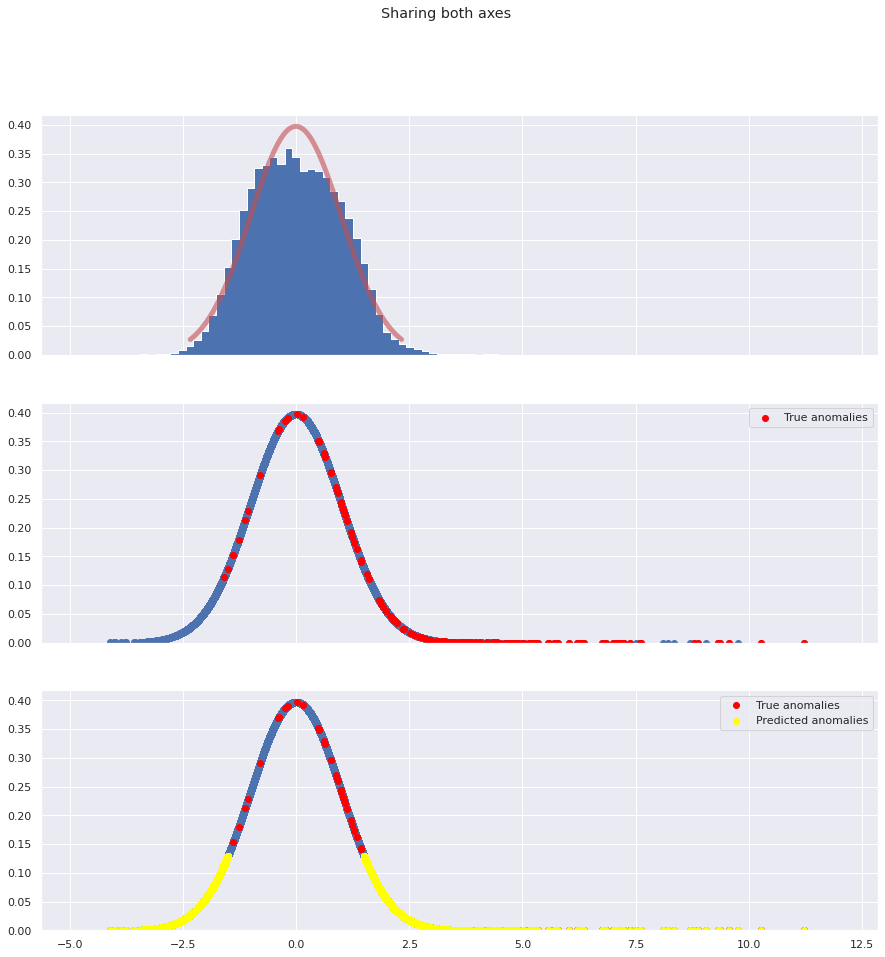

AUC: 0.117


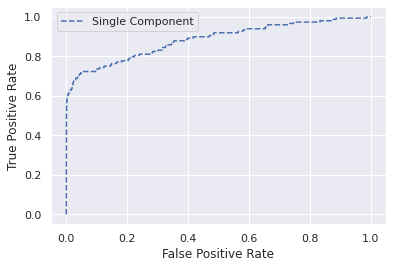

F1 score: 0.018
  var_name  epsilon       AUC  F1_score
0      V11   0.0001  0.116556  0.558952
0      V11   0.0101  0.116556  0.278481
0      V11   0.0201  0.116556  0.166210
0      V11   0.0301  0.116556  0.115028
0      V11   0.0401  0.116556  0.089649
0      V11   0.0501  0.116556  0.071788
0      V11   0.0601  0.116556  0.057400
0      V11   0.0701  0.116556  0.046833
0      V11   0.0801  0.116556  0.038831
0      V11   0.0901  0.116556  0.032137
0      V11   0.1001  0.116556  0.026952
0      V11   0.1101  0.116556  0.023266
0      V11   0.1201  0.116556  0.020567
0      V11   0.1301  0.116556  0.018236
Epsilon: 0.1401


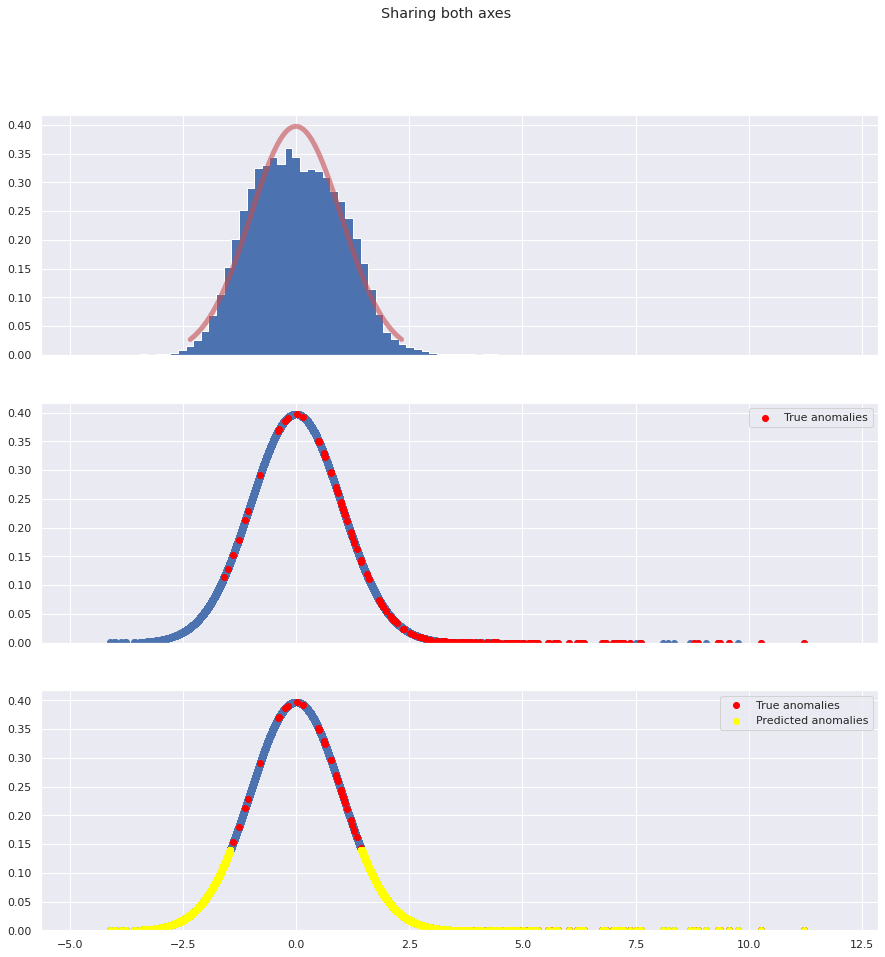

AUC: 0.117


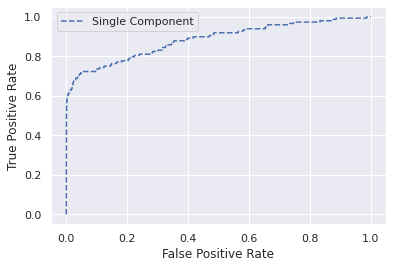

F1 score: 0.016
  var_name  epsilon       AUC  F1_score
0      V11   0.0001  0.116556  0.558952
0      V11   0.0101  0.116556  0.278481
0      V11   0.0201  0.116556  0.166210
0      V11   0.0301  0.116556  0.115028
0      V11   0.0401  0.116556  0.089649
0      V11   0.0501  0.116556  0.071788
0      V11   0.0601  0.116556  0.057400
0      V11   0.0701  0.116556  0.046833
0      V11   0.0801  0.116556  0.038831
0      V11   0.0901  0.116556  0.032137
0      V11   0.1001  0.116556  0.026952
0      V11   0.1101  0.116556  0.023266
0      V11   0.1201  0.116556  0.020567
0      V11   0.1301  0.116556  0.018236
0      V11   0.1401  0.116556  0.016127
Epsilon: 0.15009999999999998


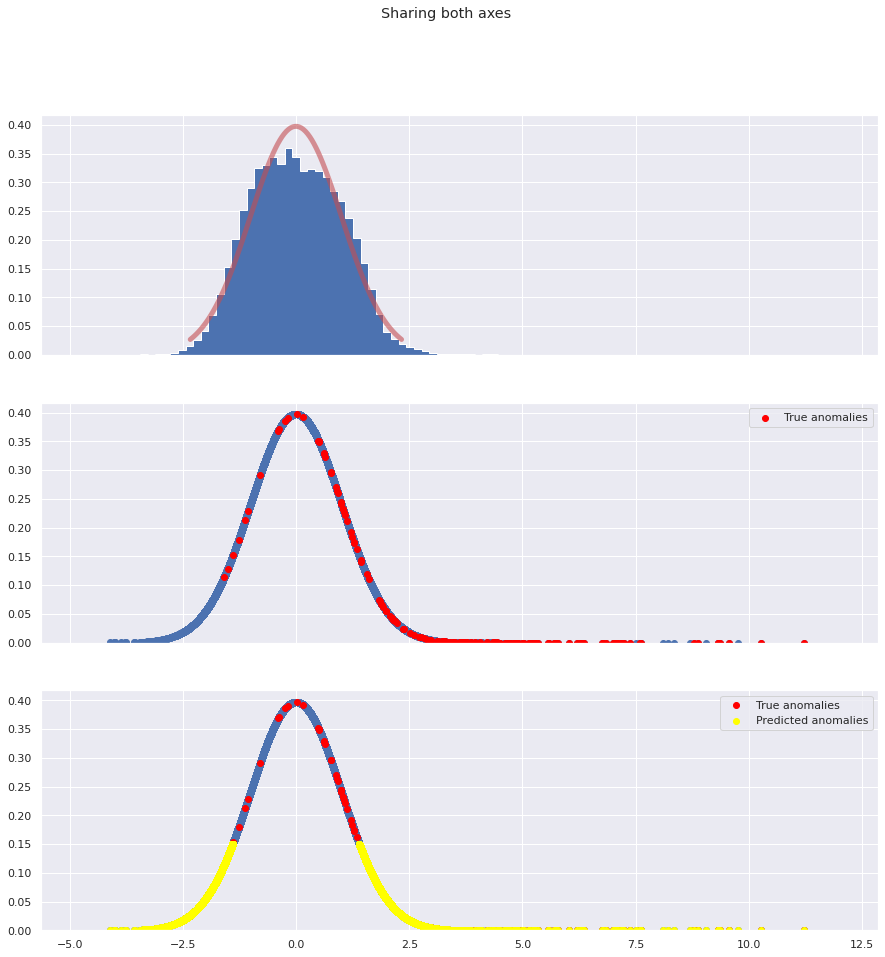

AUC: 0.117


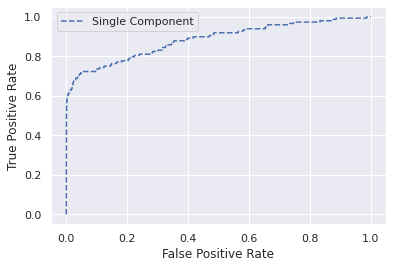

F1 score: 0.015
  var_name  epsilon       AUC  F1_score
0      V11   0.0001  0.116556  0.558952
0      V11   0.0101  0.116556  0.278481
0      V11   0.0201  0.116556  0.166210
0      V11   0.0301  0.116556  0.115028
0      V11   0.0401  0.116556  0.089649
0      V11   0.0501  0.116556  0.071788
0      V11   0.0601  0.116556  0.057400
0      V11   0.0701  0.116556  0.046833
0      V11   0.0801  0.116556  0.038831
0      V11   0.0901  0.116556  0.032137
0      V11   0.1001  0.116556  0.026952
0      V11   0.1101  0.116556  0.023266
0      V11   0.1201  0.116556  0.020567
0      V11   0.1301  0.116556  0.018236
0      V11   0.1401  0.116556  0.016127
0      V11   0.1501  0.116556  0.014768
Epsilon: 0.1601


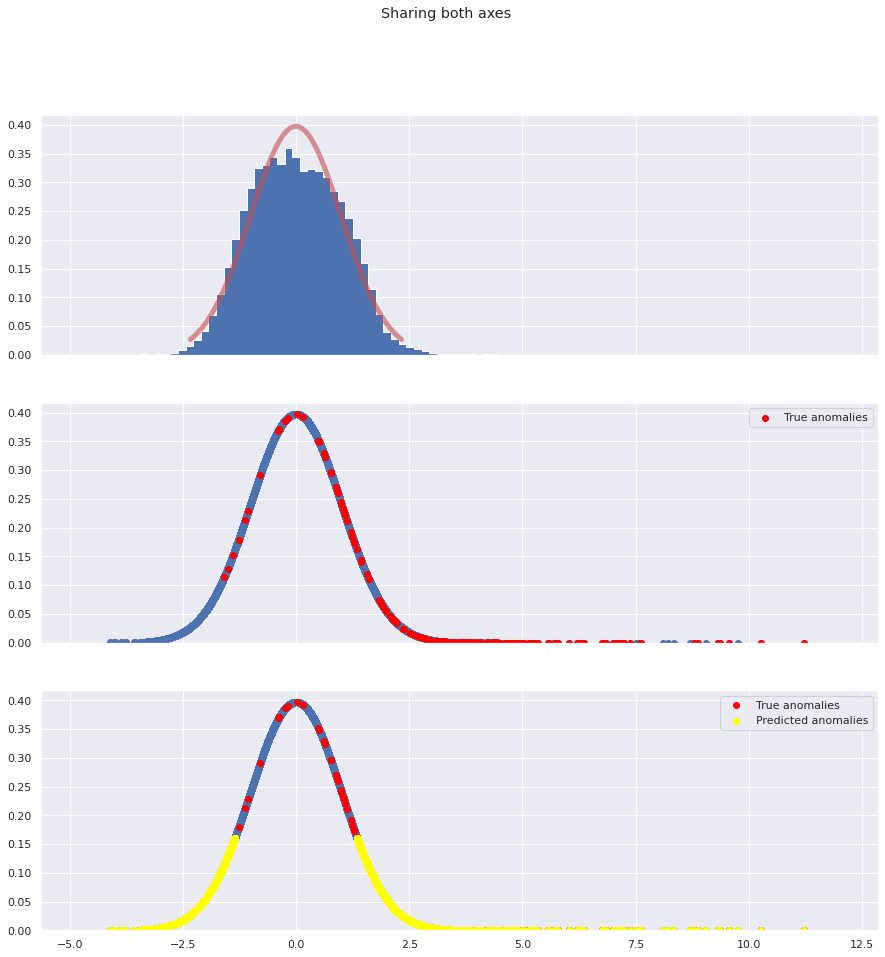

AUC: 0.117


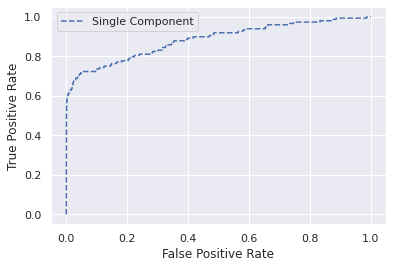

F1 score: 0.013
  var_name  epsilon       AUC  F1_score
0      V11   0.0001  0.116556  0.558952
0      V11   0.0101  0.116556  0.278481
0      V11   0.0201  0.116556  0.166210
0      V11   0.0301  0.116556  0.115028
0      V11   0.0401  0.116556  0.089649
0      V11   0.0501  0.116556  0.071788
0      V11   0.0601  0.116556  0.057400
0      V11   0.0701  0.116556  0.046833
0      V11   0.0801  0.116556  0.038831
0      V11   0.0901  0.116556  0.032137
0      V11   0.1001  0.116556  0.026952
0      V11   0.1101  0.116556  0.023266
0      V11   0.1201  0.116556  0.020567
0      V11   0.1301  0.116556  0.018236
0      V11   0.1401  0.116556  0.016127
0      V11   0.1501  0.116556  0.014768
0      V11   0.1601  0.116556  0.013431
Epsilon: 0.1701


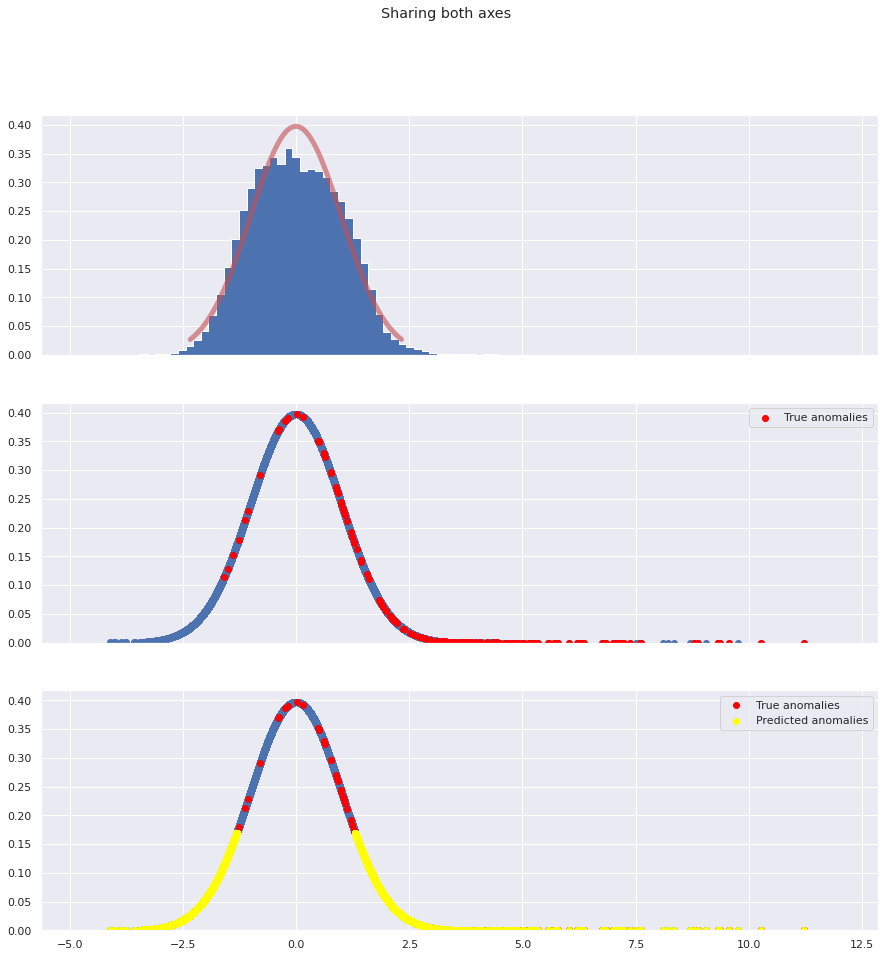

AUC: 0.117


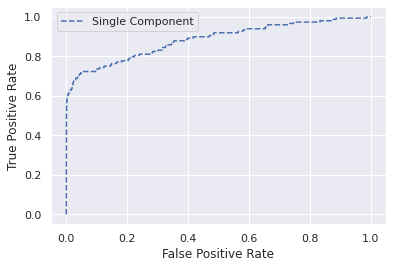

F1 score: 0.012
  var_name  epsilon       AUC  F1_score
0      V11   0.0001  0.116556  0.558952
0      V11   0.0101  0.116556  0.278481
0      V11   0.0201  0.116556  0.166210
0      V11   0.0301  0.116556  0.115028
0      V11   0.0401  0.116556  0.089649
0      V11   0.0501  0.116556  0.071788
0      V11   0.0601  0.116556  0.057400
0      V11   0.0701  0.116556  0.046833
0      V11   0.0801  0.116556  0.038831
0      V11   0.0901  0.116556  0.032137
0      V11   0.1001  0.116556  0.026952
0      V11   0.1101  0.116556  0.023266
0      V11   0.1201  0.116556  0.020567
0      V11   0.1301  0.116556  0.018236
0      V11   0.1401  0.116556  0.016127
0      V11   0.1501  0.116556  0.014768
0      V11   0.1601  0.116556  0.013431
0      V11   0.1701  0.116556  0.012295
Epsilon: 0.18009999999999998


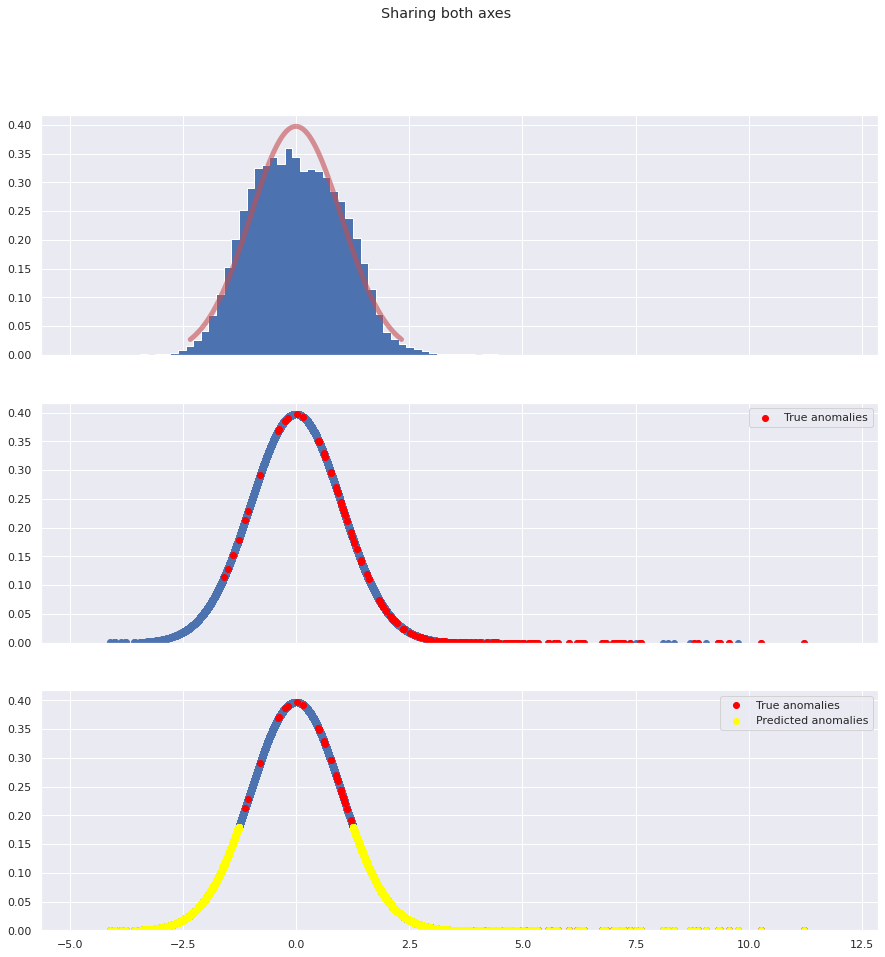

AUC: 0.117


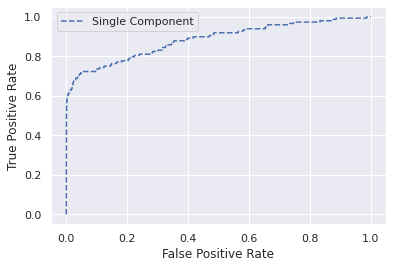

F1 score: 0.011
  var_name  epsilon       AUC  F1_score
0      V11   0.0001  0.116556  0.558952
0      V11   0.0101  0.116556  0.278481
0      V11   0.0201  0.116556  0.166210
0      V11   0.0301  0.116556  0.115028
0      V11   0.0401  0.116556  0.089649
0      V11   0.0501  0.116556  0.071788
0      V11   0.0601  0.116556  0.057400
0      V11   0.0701  0.116556  0.046833
0      V11   0.0801  0.116556  0.038831
0      V11   0.0901  0.116556  0.032137
0      V11   0.1001  0.116556  0.026952
0      V11   0.1101  0.116556  0.023266
0      V11   0.1201  0.116556  0.020567
0      V11   0.1301  0.116556  0.018236
0      V11   0.1401  0.116556  0.016127
0      V11   0.1501  0.116556  0.014768
0      V11   0.1601  0.116556  0.013431
0      V11   0.1701  0.116556  0.012295
0      V11   0.1801  0.116556  0.011479
Epsilon: 0.1901


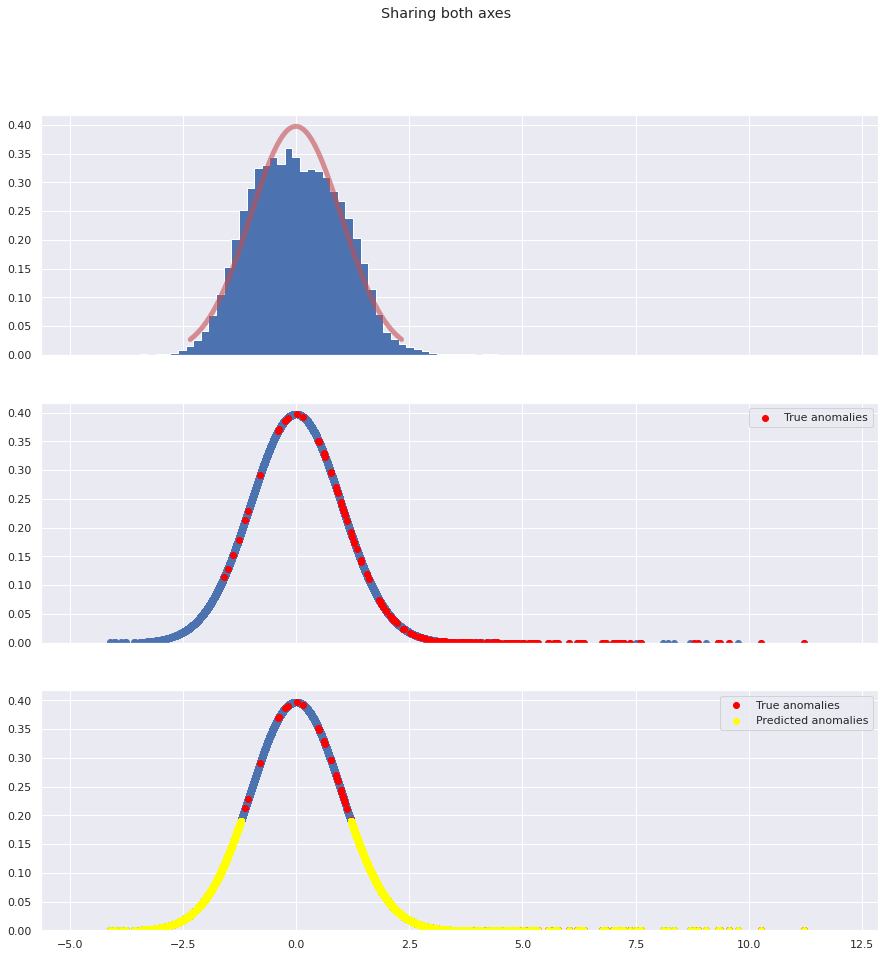

AUC: 0.117


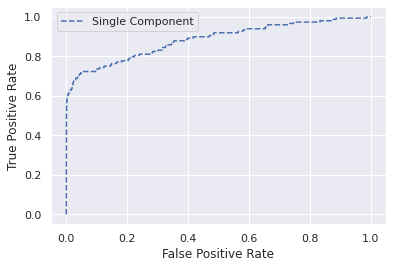

F1 score: 0.011
  var_name  epsilon       AUC  F1_score
0      V11   0.0001  0.116556  0.558952
0      V11   0.0101  0.116556  0.278481
0      V11   0.0201  0.116556  0.166210
0      V11   0.0301  0.116556  0.115028
0      V11   0.0401  0.116556  0.089649
0      V11   0.0501  0.116556  0.071788
0      V11   0.0601  0.116556  0.057400
0      V11   0.0701  0.116556  0.046833
0      V11   0.0801  0.116556  0.038831
0      V11   0.0901  0.116556  0.032137
0      V11   0.1001  0.116556  0.026952
0      V11   0.1101  0.116556  0.023266
0      V11   0.1201  0.116556  0.020567
0      V11   0.1301  0.116556  0.018236
0      V11   0.1401  0.116556  0.016127
0      V11   0.1501  0.116556  0.014768
0      V11   0.1601  0.116556  0.013431
0      V11   0.1701  0.116556  0.012295
0      V11   0.1801  0.116556  0.011479
0      V11   0.1901  0.116556  0.010626
Epsilon: 0.2001


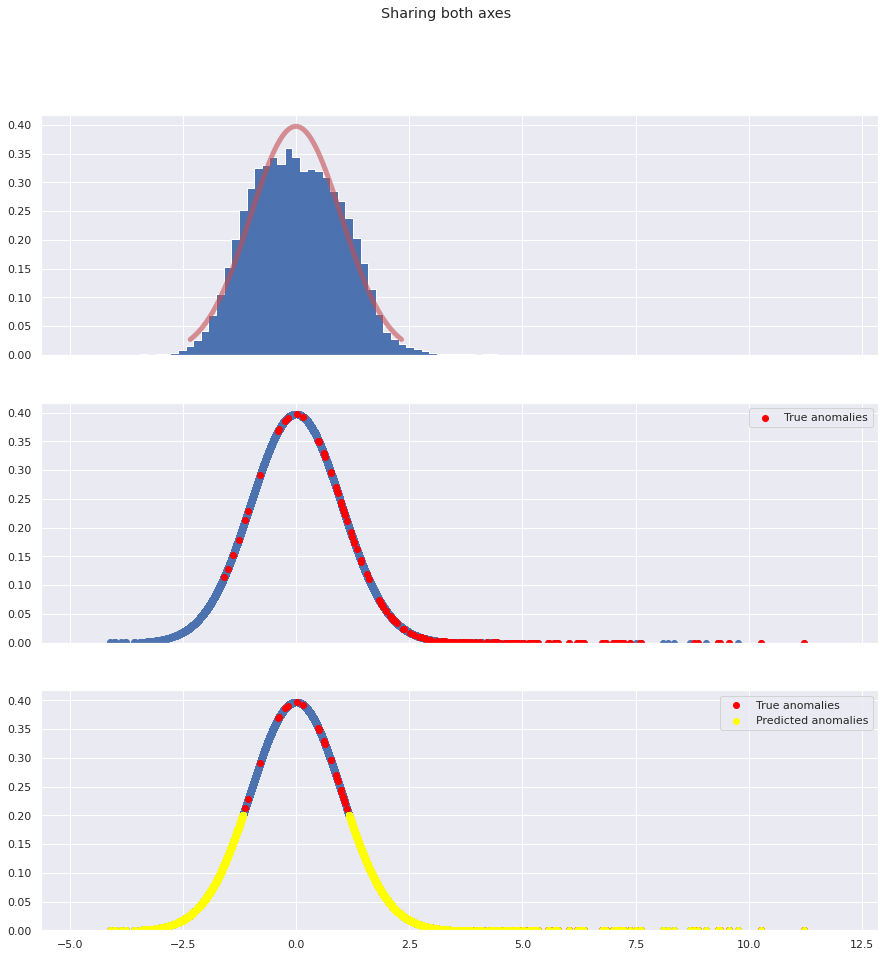

AUC: 0.117


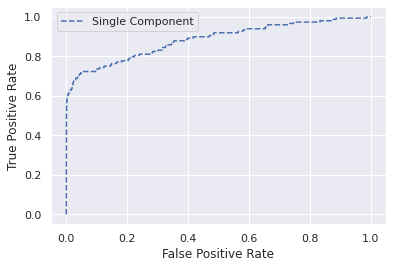

F1 score: 0.010
  var_name  epsilon       AUC  F1_score
0      V11   0.0001  0.116556  0.558952
0      V11   0.0101  0.116556  0.278481
0      V11   0.0201  0.116556  0.166210
0      V11   0.0301  0.116556  0.115028
0      V11   0.0401  0.116556  0.089649
0      V11   0.0501  0.116556  0.071788
0      V11   0.0601  0.116556  0.057400
0      V11   0.0701  0.116556  0.046833
0      V11   0.0801  0.116556  0.038831
0      V11   0.0901  0.116556  0.032137
0      V11   0.1001  0.116556  0.026952
0      V11   0.1101  0.116556  0.023266
0      V11   0.1201  0.116556  0.020567
0      V11   0.1301  0.116556  0.018236
0      V11   0.1401  0.116556  0.016127
0      V11   0.1501  0.116556  0.014768
0      V11   0.1601  0.116556  0.013431
0      V11   0.1701  0.116556  0.012295
0      V11   0.1801  0.116556  0.011479
0      V11   0.1901  0.116556  0.010626
0      V11   0.2001  0.116556  0.009862
Epsilon: 0.21009999999999998


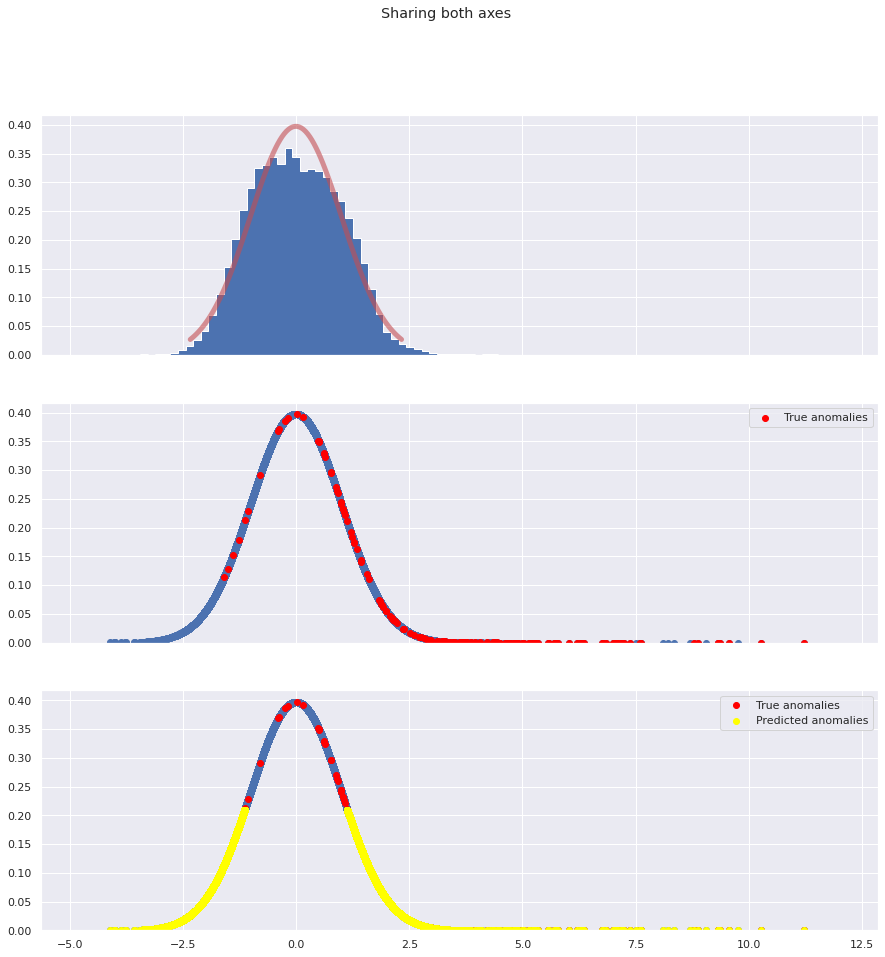

AUC: 0.117


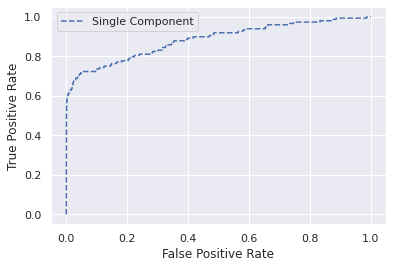

F1 score: 0.009
  var_name  epsilon       AUC  F1_score
0      V11   0.0001  0.116556  0.558952
0      V11   0.0101  0.116556  0.278481
0      V11   0.0201  0.116556  0.166210
0      V11   0.0301  0.116556  0.115028
0      V11   0.0401  0.116556  0.089649
0      V11   0.0501  0.116556  0.071788
0      V11   0.0601  0.116556  0.057400
0      V11   0.0701  0.116556  0.046833
0      V11   0.0801  0.116556  0.038831
0      V11   0.0901  0.116556  0.032137
0      V11   0.1001  0.116556  0.026952
0      V11   0.1101  0.116556  0.023266
0      V11   0.1201  0.116556  0.020567
0      V11   0.1301  0.116556  0.018236
0      V11   0.1401  0.116556  0.016127
0      V11   0.1501  0.116556  0.014768
0      V11   0.1601  0.116556  0.013431
0      V11   0.1701  0.116556  0.012295
0      V11   0.1801  0.116556  0.011479
0      V11   0.1901  0.116556  0.010626
0      V11   0.2001  0.116556  0.009862
0      V11   0.2101  0.116556  0.009120
Epsilon: 0.2201


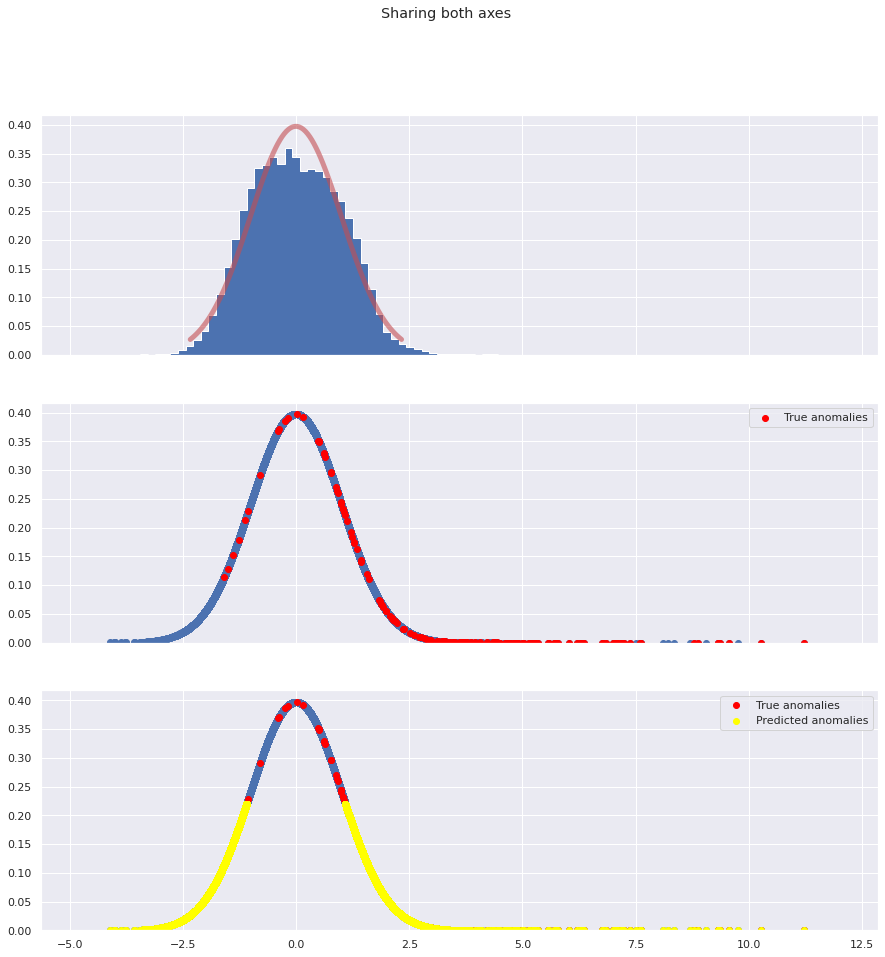

AUC: 0.117


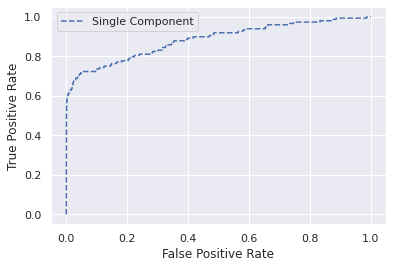

F1 score: 0.009
  var_name  epsilon       AUC  F1_score
0      V11   0.0001  0.116556  0.558952
0      V11   0.0101  0.116556  0.278481
0      V11   0.0201  0.116556  0.166210
0      V11   0.0301  0.116556  0.115028
0      V11   0.0401  0.116556  0.089649
0      V11   0.0501  0.116556  0.071788
0      V11   0.0601  0.116556  0.057400
0      V11   0.0701  0.116556  0.046833
0      V11   0.0801  0.116556  0.038831
0      V11   0.0901  0.116556  0.032137
0      V11   0.1001  0.116556  0.026952
0      V11   0.1101  0.116556  0.023266
0      V11   0.1201  0.116556  0.020567
0      V11   0.1301  0.116556  0.018236
0      V11   0.1401  0.116556  0.016127
0      V11   0.1501  0.116556  0.014768
0      V11   0.1601  0.116556  0.013431
0      V11   0.1701  0.116556  0.012295
0      V11   0.1801  0.116556  0.011479
0      V11   0.1901  0.116556  0.010626
0      V11   0.2001  0.116556  0.009862
0      V11   0.2101  0.116556  0.009120
0      V11   0.2201  0.116556  0.008616
Epsilon: 0.2301


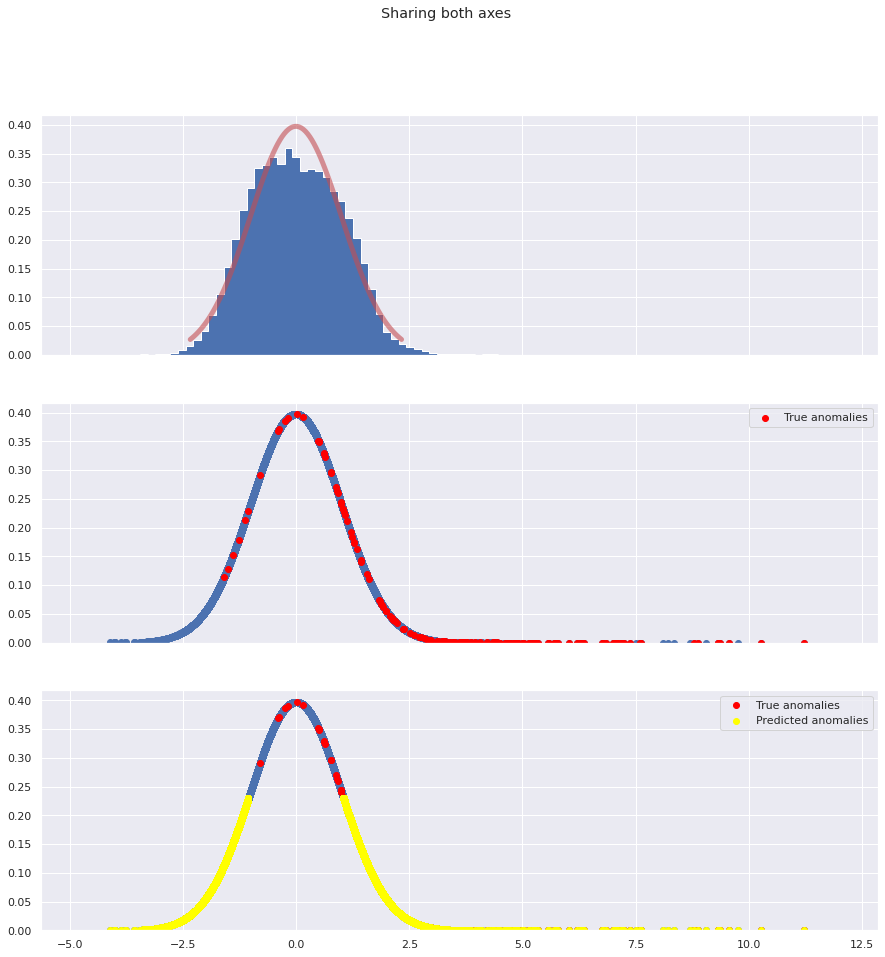

AUC: 0.117


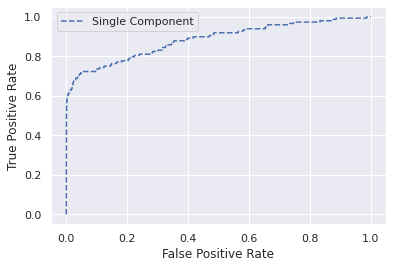

F1 score: 0.008
  var_name  epsilon       AUC  F1_score
0      V11   0.0001  0.116556  0.558952
0      V11   0.0101  0.116556  0.278481
0      V11   0.0201  0.116556  0.166210
0      V11   0.0301  0.116556  0.115028
0      V11   0.0401  0.116556  0.089649
0      V11   0.0501  0.116556  0.071788
0      V11   0.0601  0.116556  0.057400
0      V11   0.0701  0.116556  0.046833
0      V11   0.0801  0.116556  0.038831
0      V11   0.0901  0.116556  0.032137
0      V11   0.1001  0.116556  0.026952
0      V11   0.1101  0.116556  0.023266
0      V11   0.1201  0.116556  0.020567
0      V11   0.1301  0.116556  0.018236
0      V11   0.1401  0.116556  0.016127
0      V11   0.1501  0.116556  0.014768
0      V11   0.1601  0.116556  0.013431
0      V11   0.1701  0.116556  0.012295
0      V11   0.1801  0.116556  0.011479
0      V11   0.1901  0.116556  0.010626
0      V11   0.2001  0.116556  0.009862
0      V11   0.2101  0.116556  0.009120
0      V11   0.2201  0.116556  0.008616
0      V11   0.2301  0.1

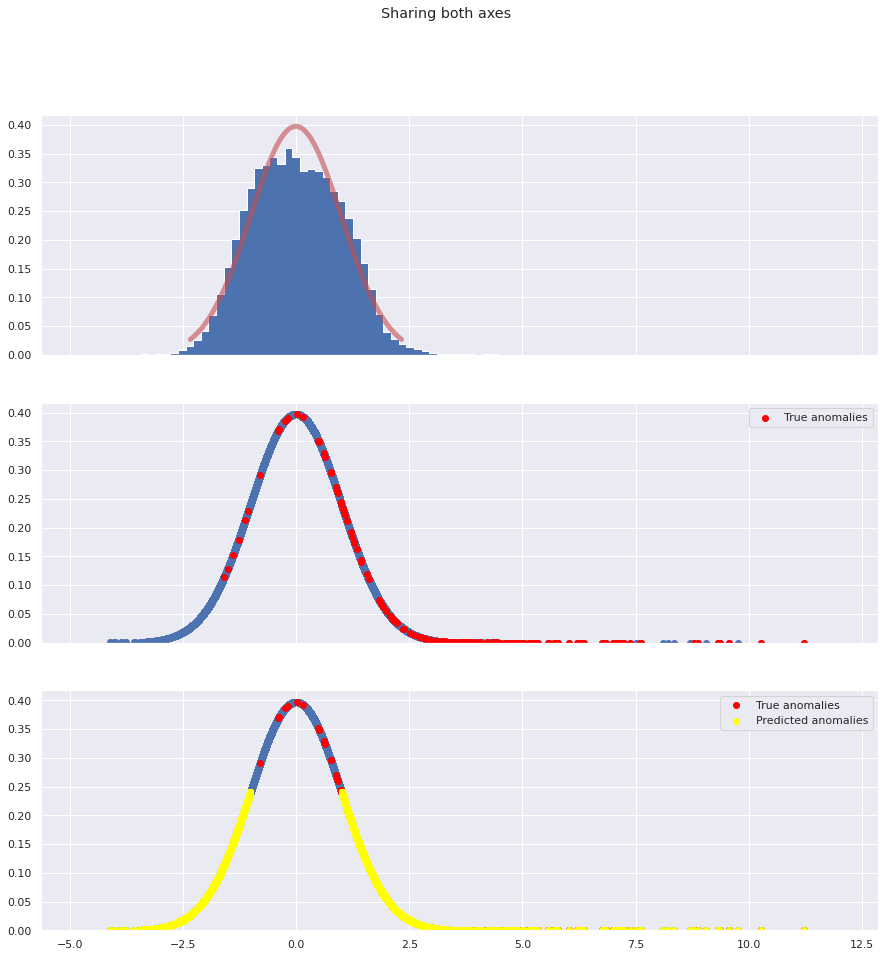

AUC: 0.117


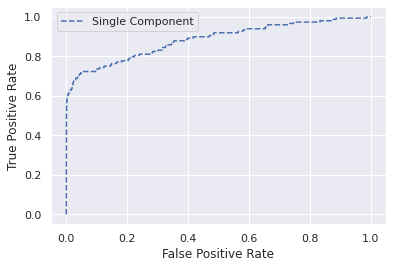

F1 score: 0.008
  var_name  epsilon       AUC  F1_score
0      V11   0.0001  0.116556  0.558952
0      V11   0.0101  0.116556  0.278481
0      V11   0.0201  0.116556  0.166210
0      V11   0.0301  0.116556  0.115028
0      V11   0.0401  0.116556  0.089649
0      V11   0.0501  0.116556  0.071788
0      V11   0.0601  0.116556  0.057400
0      V11   0.0701  0.116556  0.046833
0      V11   0.0801  0.116556  0.038831
0      V11   0.0901  0.116556  0.032137
0      V11   0.1001  0.116556  0.026952
0      V11   0.1101  0.116556  0.023266
0      V11   0.1201  0.116556  0.020567
0      V11   0.1301  0.116556  0.018236
0      V11   0.1401  0.116556  0.016127
0      V11   0.1501  0.116556  0.014768
0      V11   0.1601  0.116556  0.013431
0      V11   0.1701  0.116556  0.012295
0      V11   0.1801  0.116556  0.011479
0      V11   0.1901  0.116556  0.010626
0      V11   0.2001  0.116556  0.009862
0      V11   0.2101  0.116556  0.009120
0      V11   0.2201  0.116556  0.008616
0      V11   0.2301  0.1

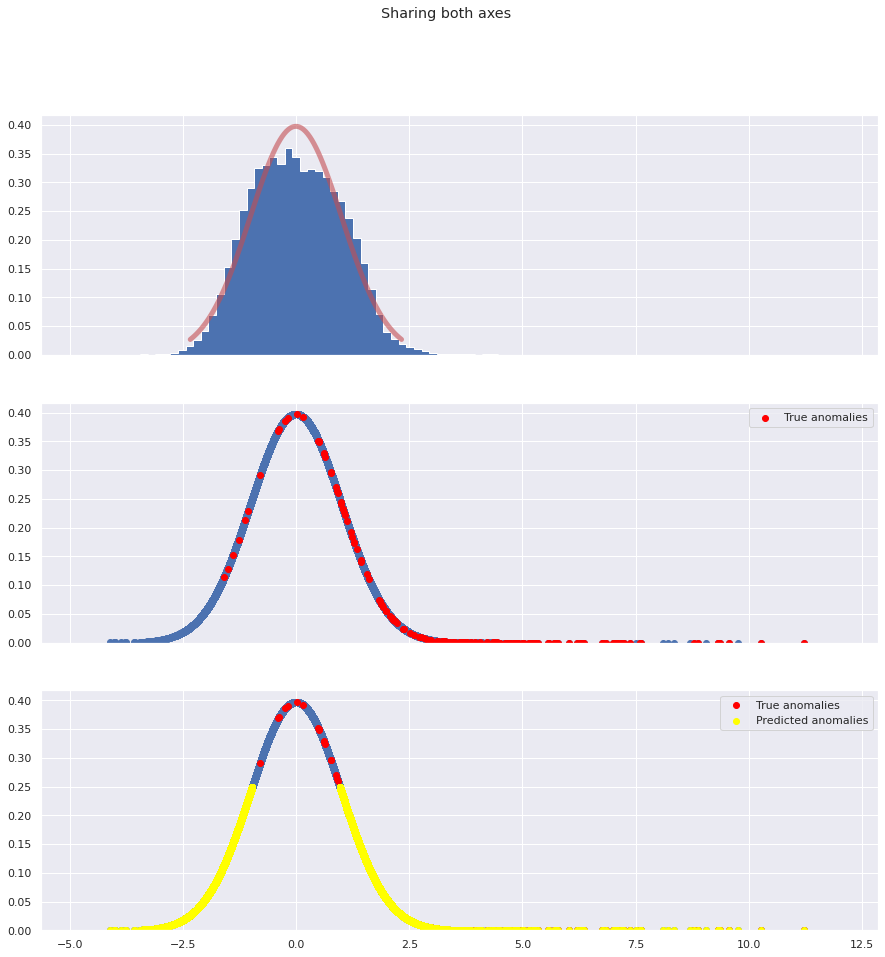

AUC: 0.117


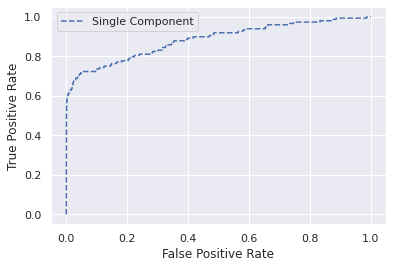

F1 score: 0.007
  var_name  epsilon       AUC  F1_score
0      V11   0.0001  0.116556  0.558952
0      V11   0.0101  0.116556  0.278481
0      V11   0.0201  0.116556  0.166210
0      V11   0.0301  0.116556  0.115028
0      V11   0.0401  0.116556  0.089649
0      V11   0.0501  0.116556  0.071788
0      V11   0.0601  0.116556  0.057400
0      V11   0.0701  0.116556  0.046833
0      V11   0.0801  0.116556  0.038831
0      V11   0.0901  0.116556  0.032137
0      V11   0.1001  0.116556  0.026952
0      V11   0.1101  0.116556  0.023266
0      V11   0.1201  0.116556  0.020567
0      V11   0.1301  0.116556  0.018236
0      V11   0.1401  0.116556  0.016127
0      V11   0.1501  0.116556  0.014768
0      V11   0.1601  0.116556  0.013431
0      V11   0.1701  0.116556  0.012295
0      V11   0.1801  0.116556  0.011479
0      V11   0.1901  0.116556  0.010626
0      V11   0.2001  0.116556  0.009862
0      V11   0.2101  0.116556  0.009120
0      V11   0.2201  0.116556  0.008616
0      V11   0.2301  0.1

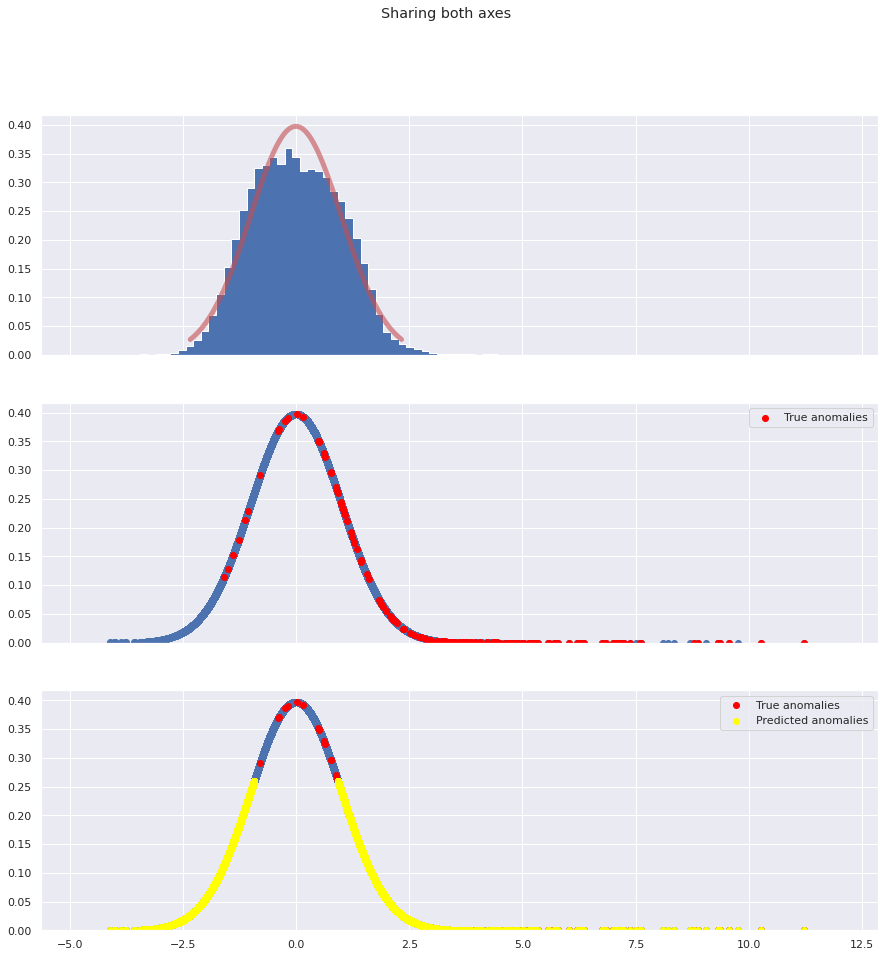

AUC: 0.117


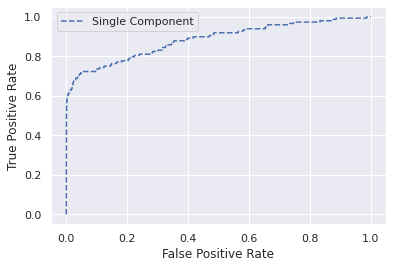

F1 score: 0.007
  var_name  epsilon       AUC  F1_score
0      V11   0.0001  0.116556  0.558952
0      V11   0.0101  0.116556  0.278481
0      V11   0.0201  0.116556  0.166210
0      V11   0.0301  0.116556  0.115028
0      V11   0.0401  0.116556  0.089649
0      V11   0.0501  0.116556  0.071788
0      V11   0.0601  0.116556  0.057400
0      V11   0.0701  0.116556  0.046833
0      V11   0.0801  0.116556  0.038831
0      V11   0.0901  0.116556  0.032137
0      V11   0.1001  0.116556  0.026952
0      V11   0.1101  0.116556  0.023266
0      V11   0.1201  0.116556  0.020567
0      V11   0.1301  0.116556  0.018236
0      V11   0.1401  0.116556  0.016127
0      V11   0.1501  0.116556  0.014768
0      V11   0.1601  0.116556  0.013431
0      V11   0.1701  0.116556  0.012295
0      V11   0.1801  0.116556  0.011479
0      V11   0.1901  0.116556  0.010626
0      V11   0.2001  0.116556  0.009862
0      V11   0.2101  0.116556  0.009120
0      V11   0.2201  0.116556  0.008616
0      V11   0.2301  0.1

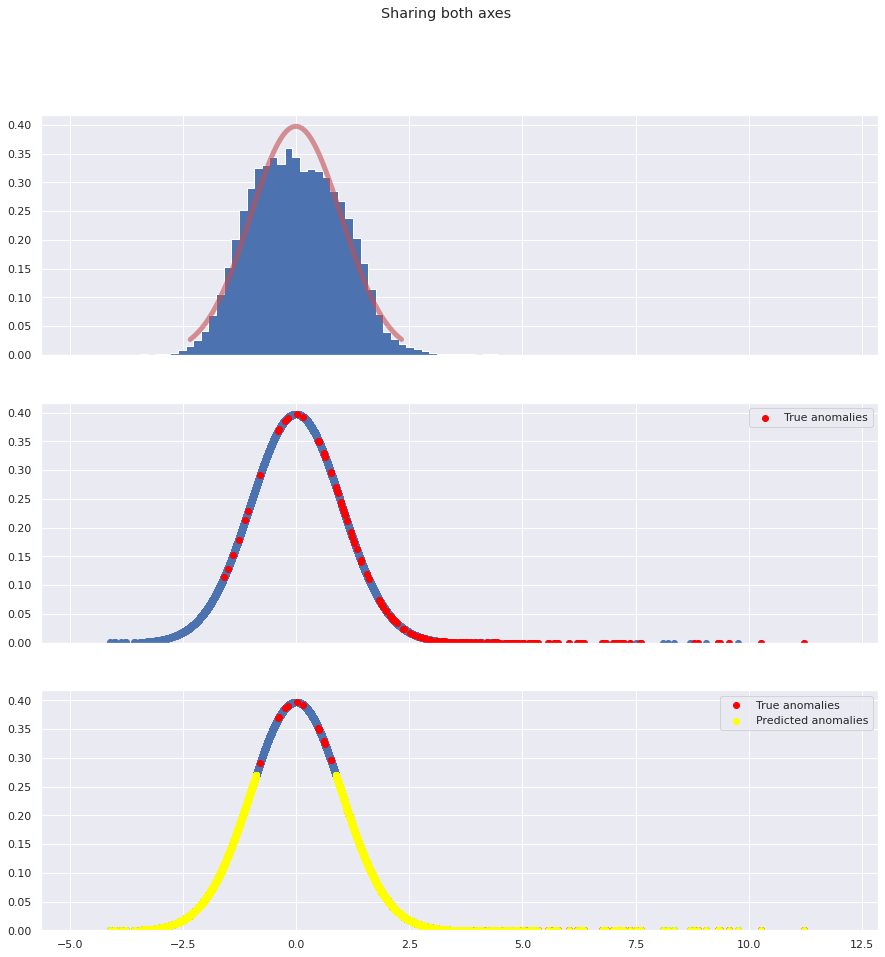

AUC: 0.117


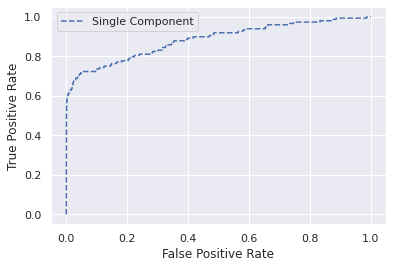

F1 score: 0.007
  var_name  epsilon       AUC  F1_score
0      V11   0.0001  0.116556  0.558952
0      V11   0.0101  0.116556  0.278481
0      V11   0.0201  0.116556  0.166210
0      V11   0.0301  0.116556  0.115028
0      V11   0.0401  0.116556  0.089649
0      V11   0.0501  0.116556  0.071788
0      V11   0.0601  0.116556  0.057400
0      V11   0.0701  0.116556  0.046833
0      V11   0.0801  0.116556  0.038831
0      V11   0.0901  0.116556  0.032137
0      V11   0.1001  0.116556  0.026952
0      V11   0.1101  0.116556  0.023266
0      V11   0.1201  0.116556  0.020567
0      V11   0.1301  0.116556  0.018236
0      V11   0.1401  0.116556  0.016127
0      V11   0.1501  0.116556  0.014768
0      V11   0.1601  0.116556  0.013431
0      V11   0.1701  0.116556  0.012295
0      V11   0.1801  0.116556  0.011479
0      V11   0.1901  0.116556  0.010626
0      V11   0.2001  0.116556  0.009862
0      V11   0.2101  0.116556  0.009120
0      V11   0.2201  0.116556  0.008616
0      V11   0.2301  0.1

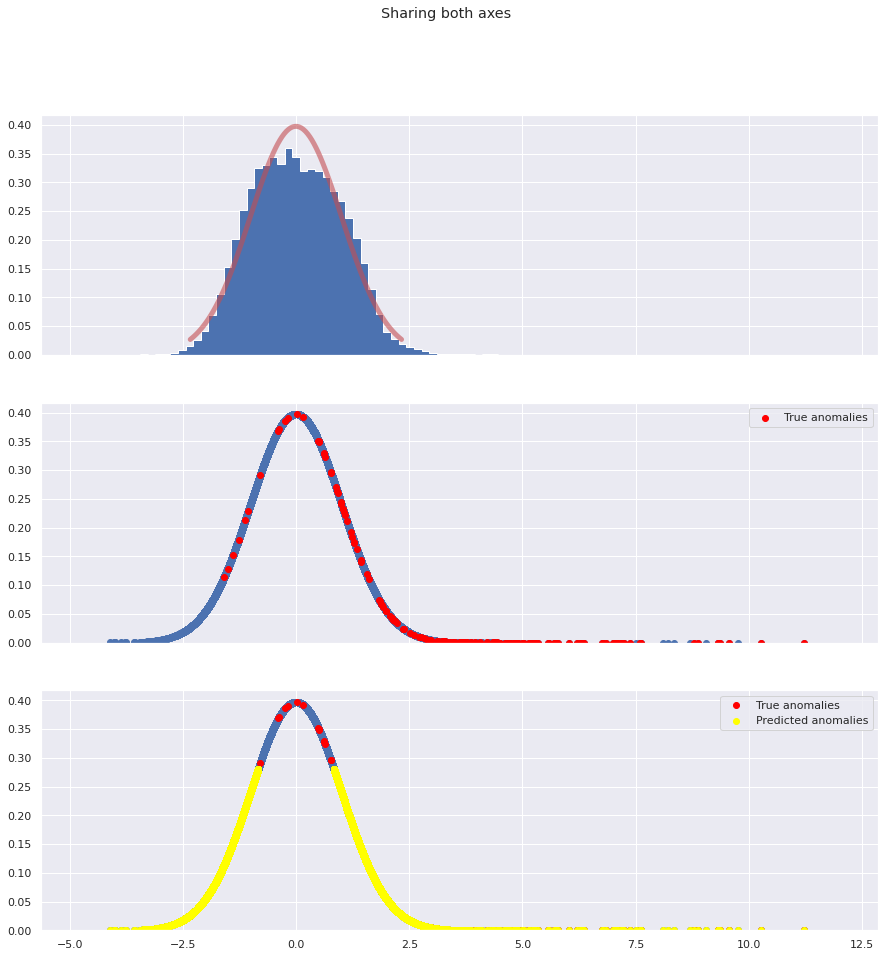

AUC: 0.117


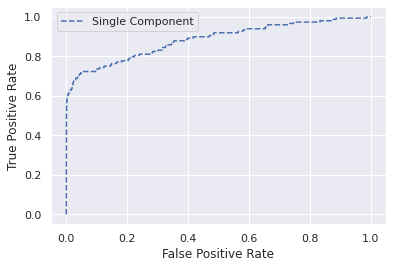

F1 score: 0.006
  var_name  epsilon       AUC  F1_score
0      V11   0.0001  0.116556  0.558952
0      V11   0.0101  0.116556  0.278481
0      V11   0.0201  0.116556  0.166210
0      V11   0.0301  0.116556  0.115028
0      V11   0.0401  0.116556  0.089649
0      V11   0.0501  0.116556  0.071788
0      V11   0.0601  0.116556  0.057400
0      V11   0.0701  0.116556  0.046833
0      V11   0.0801  0.116556  0.038831
0      V11   0.0901  0.116556  0.032137
0      V11   0.1001  0.116556  0.026952
0      V11   0.1101  0.116556  0.023266
0      V11   0.1201  0.116556  0.020567
0      V11   0.1301  0.116556  0.018236
0      V11   0.1401  0.116556  0.016127
0      V11   0.1501  0.116556  0.014768
0      V11   0.1601  0.116556  0.013431
0      V11   0.1701  0.116556  0.012295
0      V11   0.1801  0.116556  0.011479
0      V11   0.1901  0.116556  0.010626
0      V11   0.2001  0.116556  0.009862
0      V11   0.2101  0.116556  0.009120
0      V11   0.2201  0.116556  0.008616
0      V11   0.2301  0.1

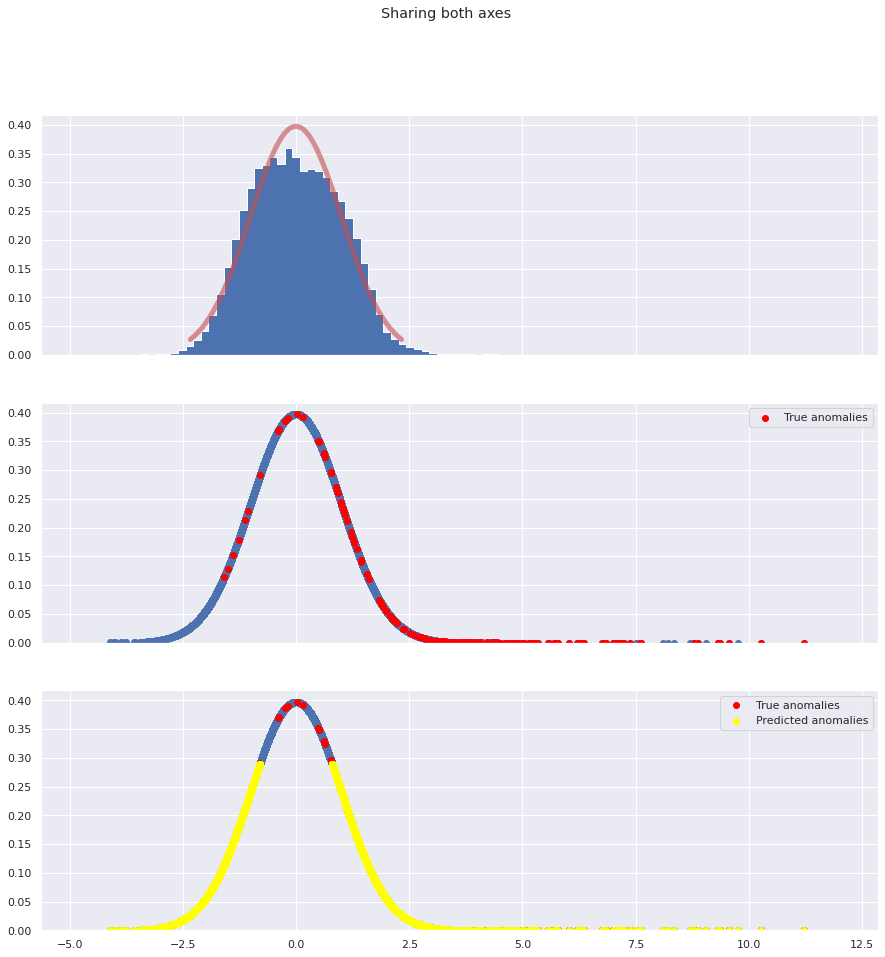

AUC: 0.117


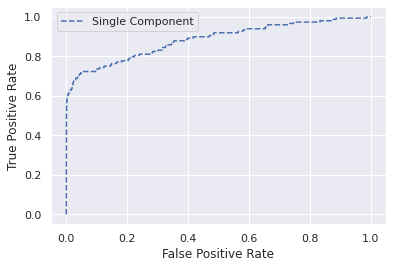

F1 score: 0.006
  var_name  epsilon       AUC  F1_score
0      V11   0.0001  0.116556  0.558952
0      V11   0.0101  0.116556  0.278481
0      V11   0.0201  0.116556  0.166210
0      V11   0.0301  0.116556  0.115028
0      V11   0.0401  0.116556  0.089649
0      V11   0.0501  0.116556  0.071788
0      V11   0.0601  0.116556  0.057400
0      V11   0.0701  0.116556  0.046833
0      V11   0.0801  0.116556  0.038831
0      V11   0.0901  0.116556  0.032137
0      V11   0.1001  0.116556  0.026952
0      V11   0.1101  0.116556  0.023266
0      V11   0.1201  0.116556  0.020567
0      V11   0.1301  0.116556  0.018236
0      V11   0.1401  0.116556  0.016127
0      V11   0.1501  0.116556  0.014768
0      V11   0.1601  0.116556  0.013431
0      V11   0.1701  0.116556  0.012295
0      V11   0.1801  0.116556  0.011479
0      V11   0.1901  0.116556  0.010626
0      V11   0.2001  0.116556  0.009862
0      V11   0.2101  0.116556  0.009120
0      V11   0.2201  0.116556  0.008616
0      V11   0.2301  0.1

In [19]:

for i in range(0, len(epsilons)): 
  var_name = 'V11'
  epsilon = epsilons[i]
  print("Epsilon: {}".format(epsilon))

  arr = np.array(non_fraud_X_train[var_name])
  std_dev = np.std(arr)
  mean = np.mean(arr)


  norm = stats.norm(

      loc = mean,  ### REPLACE "0" WITH YOUR CODE TO GET THE MEAN OF V11 ### 
      scale = std_dev ### REPLACE "0" WITH YOUR CODE TO GET THE STANDARD DEVIATION OF V11 ### 

  )



  fig, axs = plt.subplots(3, sharex=True, sharey=True, figsize=(15, 15)) 
  fig.suptitle('Sharing both axes')



  x = np.linspace(norm.ppf(0.01),
                  norm.ppf(0.99), 100)
  axs[0].plot(x, norm.pdf(x),
        'r-', lw=5, alpha=0.6, label='norm pdf')
  axs[0].hist(X_train[var_name].values, density=True, histtype='stepfilled', bins=100);


  x = np.array(X_test[var_name])
  mu = mean
  sigma = std_dev
  probs = p_x(x, mu, sigma)
  preds = np.where(probs < epsilon, 1, 0)

  summary_df = pd.DataFrame(np.hstack((x[:, None], probs[:,None], y_test[:,None], preds[:,None])), columns=['X_test', 'p(x)', 'y_test', 'y_pred'])


  axs[1].scatter(summary_df['X_test'], summary_df['p(x)'])
  axs[1].scatter(summary_df[summary_df['y_test']==1]['X_test'], summary_df[summary_df['y_test']==1]['p(x)'], color='red', label = 'True anomalies')
  axs[1].legend()



  axs[2].scatter(summary_df['X_test'], summary_df['p(x)'])
  axs[2].scatter(summary_df[summary_df['y_test']==1]['X_test'], summary_df[summary_df['y_test']==1]['p(x)'], color='red', label = 'True anomalies')
  axs[2].scatter(summary_df[summary_df['y_pred']==1]['X_test'], summary_df[summary_df['y_pred']==1]['p(x)'], color='yellow', label = 'Predicted anomalies')
  axs[2].legend()



  plt.show()


  fpr, tpr, thresholds = roc_curve(summary_df['y_test'], summary_df['p(x)'])
  auc = roc_auc_score(summary_df['y_test'], summary_df['p(x)'])
  print('AUC: %.3f' % auc)

  fpr_sc, tpr_sc, _ = roc_curve(y_test, 1-probs)
  plt.plot(fpr_sc, tpr_sc, linestyle = '--', label='Single Component')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend()
  plt.show()


  from sklearn.metrics import f1_score

  f1_score = f1_score(summary_df['y_test'], summary_df['y_pred'])
  print("F1 score: %.3f" % f1_score)

  new_results = pd.DataFrame({"var_name":[var_name], "epsilon":[epsilon], "AUC":[auc], "F1_score":[f1_score]})

  results = results.append(new_results)
  results = results.drop_duplicates()
  print(results)

In [24]:
results.reset_index(inplace=True)

In [25]:
results

,index,var_name,epsilon,AUC,F1_score
0,0,V11,0.0001,0.116556,0.558952
1,0,V11,0.0101,0.116556,0.278481
2,0,V11,0.0201,0.116556,0.166210
3,0,V11,0.0301,0.116556,0.115028
4,0,V11,0.0401,0.116556,0.089649
5,0,V11,0.0501,0.116556,0.071788
6,0,V11,0.0601,0.116556,0.057400
7,0,V11,0.0701,0.116556,0.046833
8,0,V11,0.0801,0.116556,0.038831
9,0,V11,0.0901,0.116556,0.032137


In [30]:
optimal_epsilon = results.iloc[[results['F1_score'].idxmax()]]['epsilon'].iloc[0]
optimal_epsilon

0.0001

In [29]:


def plot_gaussian_for_feature(df, feature_name):
  var_name = feature_name

  fig, ax = plt.subplots(1, 1)
  x = np.linspace(norm.ppf(0.01),
                  norm.ppf(0.99), 100)
  ax.plot(x, norm.pdf(x),
        'r-', lw=5, alpha=0.6, label='norm pdf')
  ax.hist(df[var_name].values, density=True, histtype='stepfilled', bins=100);
  plt.show()

def get_feature_mean(df, var_name):
  non_fraud = df[df['Class']==0]
  arr = np.array(non_fraud[var_name])
  return np.mean(arr)


def get_feature_std_dev(df, var_name):
  non_fraud = df[df['Class']==0]
  arr = np.array(non_fraud[var_name])
  return np.std(arr)

def is_anomalous(value, epsilon):
  if value < epsilon: 
    return 1
  else:
    return 0


def get_accuracy(feature_name): 
  df_output = predict_feature(feature_name)
  y_pred_var = 'y_pred_'+feature_name
  y_true = df_output['y_train']
  y_pred = df_output[y_pred_var]
  return accuracy_score(y_true, y_pred)

def predict_feature(df, feature_name): 
  mu = get_feature_mean(df, feature_name)
  sigma= get_feature_std_dev(df, feature_name) 
  non_fraud = df[df['Class']==0]  
  current_feature_x = np.array(non_fraud[feature_name])

  x_s = []
  y_pred = []
  for i in range(0, len(current_feature_x)): 
    x_i=current_feature_x[i]
    px = p_x(x_i, mu, sigma)
    anomaly = is_anomalous(px, 0.02)
    x_s.append(x_i)
    y_pred.append(anomaly)

  y_pred_var = 'y_pred_'+feature_name
  df2 = pd.DataFrame(list(zip(current_feature_x, y_pred, y_train)), 
               columns =['current_feature_x', y_pred_var,'y_train']) 
  
  return df2



### One Gaussian

In [30]:
feature_name = 'V11'
plot_gaussian_for_feature(non_fraud_train, feature_name)

NameError: ignored

In [ ]:
mu = get_feature_mean(non_fraud_train, feature_name)
sigma= get_feature_std_dev(non_fraud_train, feature_name) 

current_feature_x = np.array(train_df[feature_name])

x_s = []
y_pred = []
for i in range(0, len(current_feature_x)): 
  x_i=current_feature_x[i]
  px = p_x(x_i, mu, sigma)
  anomaly = is_anomalous(px, 0.02)
  x_s.append(x_i)
  y_pred.append(anomaly)

y_pred_var = 'y_pred_'+feature_name
y_train = train_df['Class']
df2 = pd.DataFrame(list(zip(current_feature_x, y_pred, y_train)), 
              columns =['current_feature_x', y_pred_var,'y_train']) 
df2

,current_feature_x,y_pred_V11,y_train
0,-0.127305,0,0
1,-2.254597,0,0
2,1.221812,0,0
3,-0.576288,0,0
4,-0.235637,0,0
...,...,...,...
187968,-0.254751,0,0
187969,-1.566713,0,0
187970,-0.563028,0,0
187971,0.951835,0,0


In [ ]:
len(current_feature_x)

187973

In [ ]:
len(y_pred)

187973

In [ ]:
len(y_train)

187973

In [ ]:
non_fraud['Class']

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284315, dtype: int64

In [ ]:
len(current_feature_x), len(y_pred), len(y_train)

(284807, 284807, 190820)

In [ ]:
len(x_s), len(y_pred), len(df)

(284807, 284807, 284807)

In [ ]:
vars = list(X_train.columns)[1:-2]

In [ ]:
for i in range(0, len(vars)): 
  print(vars[i], "accuracy:{}".format(get_accuracy(vars[i])))

V1 accuracy:0.9742322607693114
V2 accuracy:0.9716958390105859
V3 accuracy:0.9844670369982182
V4 accuracy:0.9639660412954617
V5 accuracy:0.9774447122943087
V6 accuracy:0.9423645320197044
V7 accuracy:0.9812545854732209
V8 accuracy:0.9787129231736715
V9 accuracy:0.979373231317472
V10 accuracy:0.9830468504349649
V11 accuracy:0.9919505292946232
V12 accuracy:0.971355203857038
V13 accuracy:0.9801750340635154
V14 accuracy:0.9784666177549524
V15 accuracy:0.9819096530761975
V16 accuracy:0.9832093072005031
V17 accuracy:0.9867099884708102
V18 accuracy:0.9805418719211823
V19 accuracy:0.9757362959857457
V20 accuracy:0.9771826852531181
V21 accuracy:0.9823865422911644
V22 accuracy:0.9891468399538832
V23 accuracy:0.9832564720679174
V24 accuracy:0.9836233099255843
V25 accuracy:0.9834241693742795
V26 accuracy:0.9924012158054711
V27 accuracy:0.9806728854417776
V28 accuracy:0.986741431715753


### Two Gaussians 

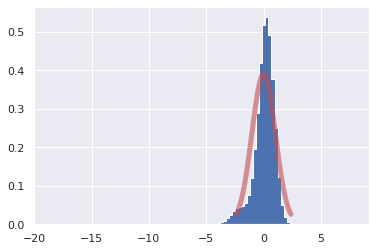

In [ ]:
feature_name = 'V12'
plot_gaussian_for_feature(feature_name)

In [ ]:
# Two Gaussians
### HERE ###

## Part 3: Multivariate and Mixture of Gaussian Distribution [7 Marks]
We want to build an outlier detection model that boosts our F1 score compared to the last part. To design your model, you can benefit from:

*   Any number of features you want (multivariate).
*   You can fit your Gaussians only on non-fraudulent transactions or to both classes.
*   To fit your model, you can take advantage of the Gaussian mixture model where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) (take a look at the hint below).

It is up to you how to design your model. Try at least 5 different models and report the F1 score for each one. If your model requires a threshold to classify transactions, draw a ROC curve for each model, and compare them with part 2.1. Try to maximize your F1 score. What kind of model works better? How many features? Which features? How many Gaussians? How many components? Summarize your findings with tables and plots. 


**HINT!**

Does it make sense to have more than two Gaussians (or a mixture with more than 2 components) in this kind of (binary) task?

 The answer is YES, and it depends on the distribution of data. Remember the tutorial, where we had 5 clusters and fit a mixture of 5 Gaussians to detect outliers. Consider the transaction is valid if it is close to each one of those five clusters, and it is not valid if it is not close to them! For example (figure below), assume we have a high volume of legitimate transactions in the morning until lunchtime (9 AM to 12 PM). We have fewer transactions during lunchtime. Then we have another pick between (1 PM to 4 PM). In this example, it is reasonable to have two valid clusters (compenents), one for the morning and another for the afternoon transactions.
 ![Example:](https://raw.githubusercontent.com/aps1070-2019/datasets/master/img/AMoW2.png)


In [ ]:
### HERE ###